# Complete EDA of Titanic Dataset

- Survival - Survival (0 = No, 1=Yes). Not included in test.csv file
- Pclass   - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name     - Name
- Sex      - Sex
- Age      - Age
- Sibsp    - Number of Siblings/ Spouses Aboard
- Parch    - Number of Parents/ Children Aboard
- Ticket   - Ticket Number
- Fare     - Passenger Fare
- Cabin    - Cabin
- Embarked - Port of Embarkation (C=Cherbourg; Q=Queenstown; S=Southampton)

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 100

In [3]:
url = 'https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv'

In [4]:
titanic = pd.read_html(url)[0]

In [5]:
titanic.dropna(axis=1, how='all', inplace=True)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [10]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
titanic.isna().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

## Heatmap

In [12]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


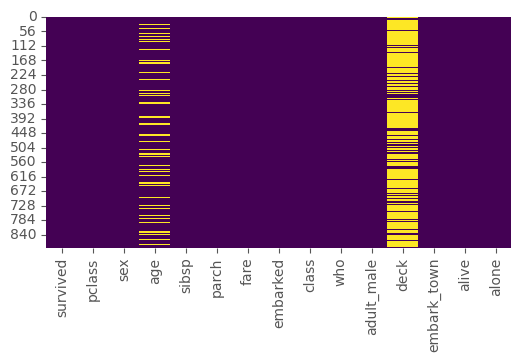

In [13]:
sns.heatmap(titanic.isnull(), cmap='viridis',cbar=False)
plt.show()

In [14]:
corrmat=  titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


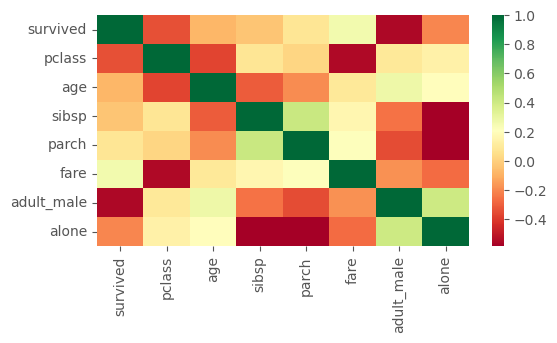

In [15]:
sns.heatmap(corrmat,cmap='RdYlGn')
plt.show()

## Univariate Analysis

In [16]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


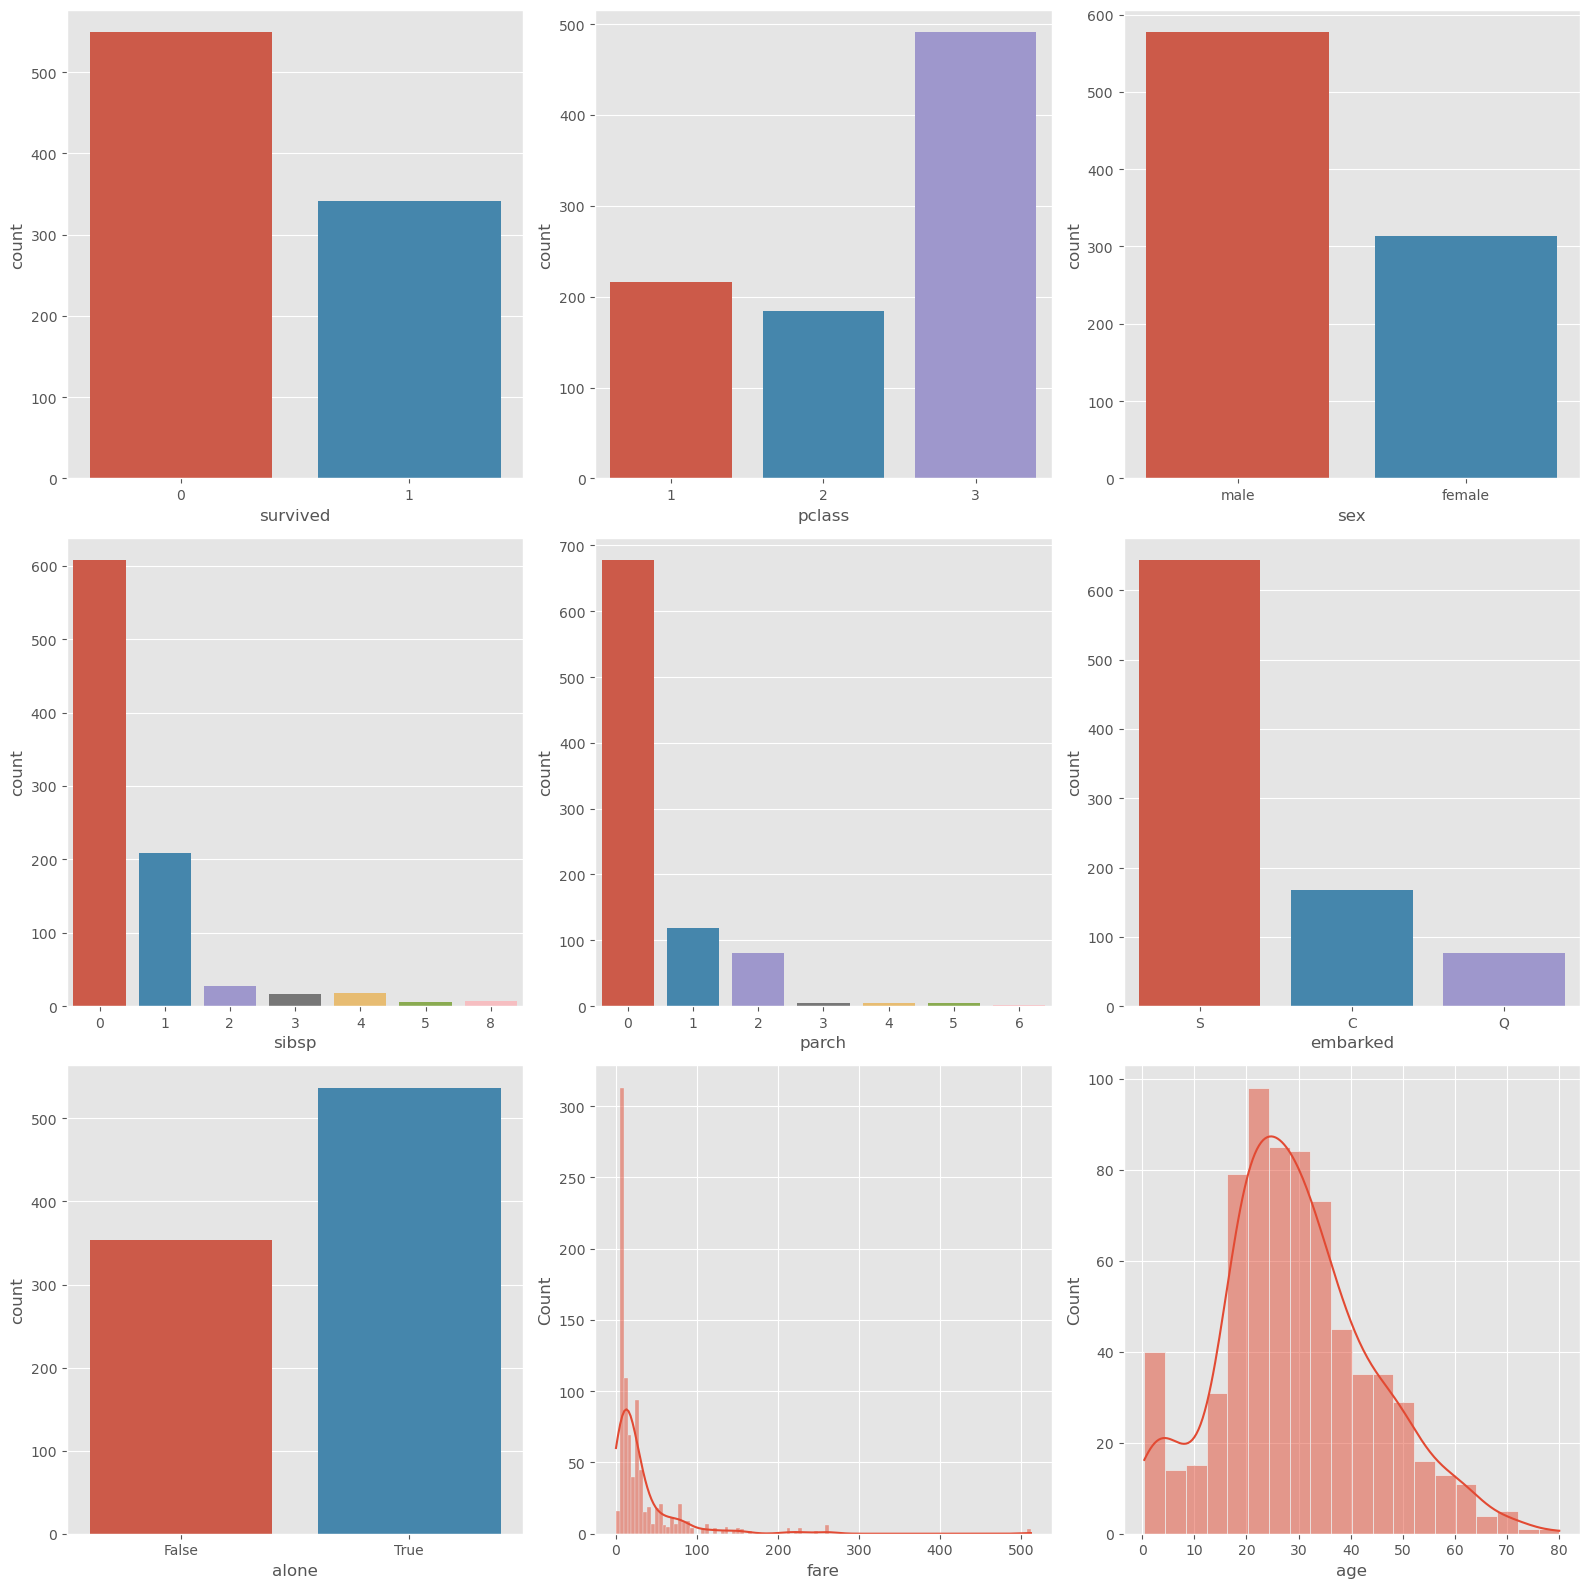

In [17]:
fig, ax = plt.subplots(3,3, figsize=(16,16))

# for categorical data
sns.countplot(x='survived',data=titanic, ax=ax[0][0])
sns.countplot(x='pclass',data=titanic,ax=ax[0][1])
sns.countplot(x='sex',data=titanic,ax=ax[0][2])
sns.countplot(x='sibsp',data=titanic,ax=ax[1][0])
sns.countplot(x='parch',data=titanic,ax=ax[1][1])
sns.countplot(x='embarked',data=titanic,ax=ax[1][2])
sns.countplot(x='alone',data=titanic,ax=ax[2][0])

# for continuous data
sns.histplot(titanic['fare'], kde=True, ax=ax[2][1])
sns.histplot(titanic['age'], kde=True, ax=ax[2][2])

plt.tight_layout()

**Analysis**:

- Number of people survived are less compared to people who could make the end.
- Maximum number of people are from 3rd class
- % of males is higher compared to females
- Maximum number of people travelled alone, second to that are travelled with one person along with them.
- Maximum number of people are embarked from Southampton.

<AxesSubplot: xlabel='fare', ylabel='Count'>

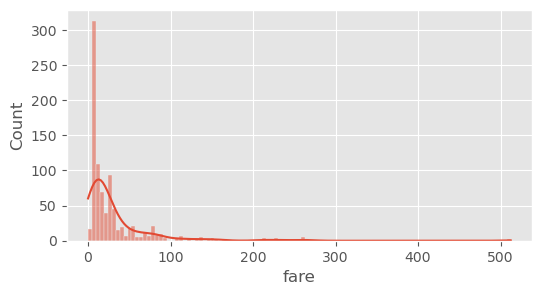

In [18]:
sns.histplot(titanic['fare'], kde=True)

## Survived

In [19]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [20]:
titanic['survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: survived, dtype: float64

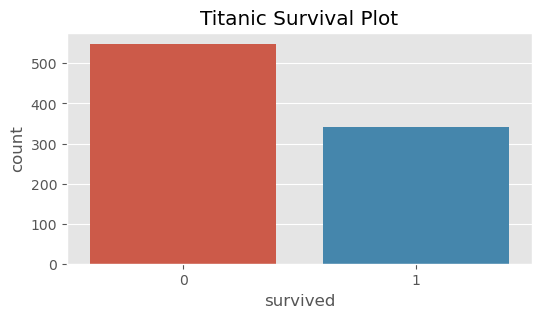

In [21]:
sns.countplot(x='survived', data=titanic)
plt.title('Titanic Survival Plot')
plt.show()

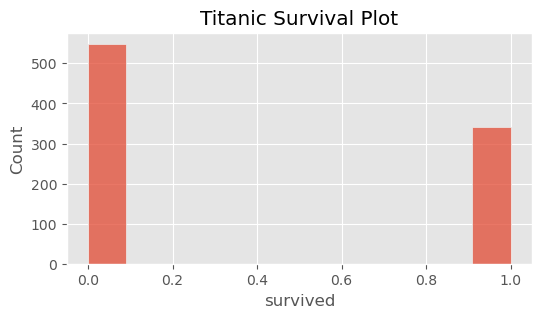

In [22]:
sns.histplot(x='survived',data=titanic)
plt.title('Titanic Survival Plot')
plt.show()

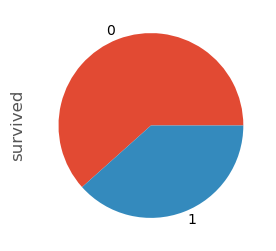

In [23]:
titanic.survived.value_counts().plot.pie()
plt.show()

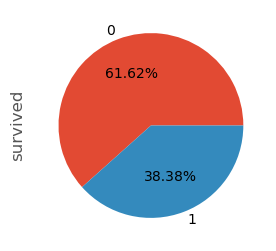

In [24]:
titanic.survived.value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

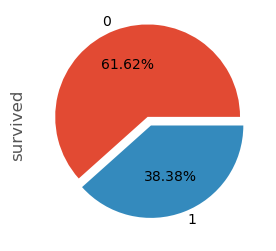

In [25]:
explode = [0.1,0]

titanic.survived.value_counts().plot.pie(autopct='%1.2f%%', explode=explode)
plt.show()

## Pclass

In [26]:
titanic['pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [27]:
titanic.groupby(['pclass','survived']).survived.count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [28]:
(titanic.groupby(['pclass','survived']).survived.count()/titanic.shape[0])*100

pclass  survived
1       0            8.978676
        1           15.263749
2       0           10.886644
        1            9.764310
3       0           41.750842
        1           13.355780
Name: survived, dtype: float64

In [29]:
titanic.groupby('pclass').survived.count()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

In [30]:
pd.crosstab(titanic.survived,titanic.pclass,margins=True,normalize=True)*100

pclass,1,2,3,All
survived,,,,
0,8.978676,10.886644,41.750842,61.616162
1,15.263749,9.764310,13.355780,38.383838
All,24.242424,20.650954,55.106622,100.000000


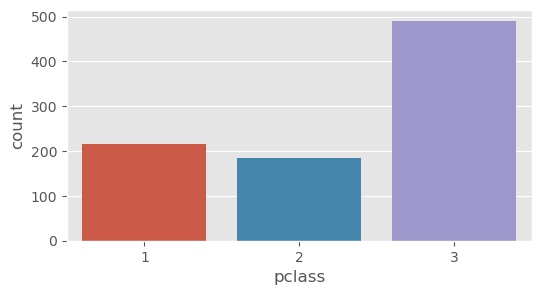

In [31]:
sns.countplot(x='pclass',data=titanic)
plt.show()

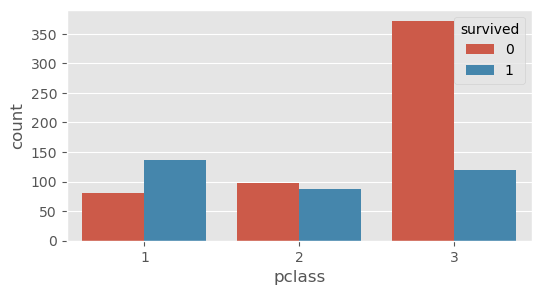

In [32]:
sns.countplot(x='pclass',data=titanic, hue='survived')
plt.show()

<AxesSubplot: ylabel='pclass'>

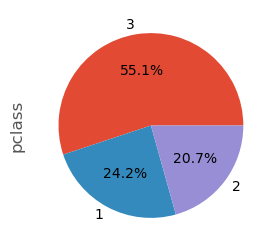

In [33]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.1f%%')

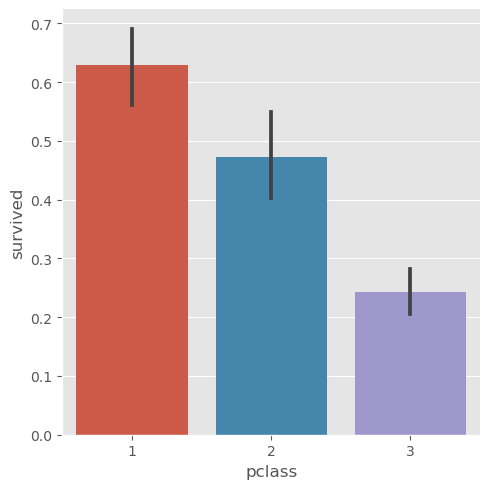

In [34]:
sns.catplot(x='pclass',y='survived',data=titanic, kind='bar')

**Analysis**:
If the passenger is travelling in high class, the survival chances are high.

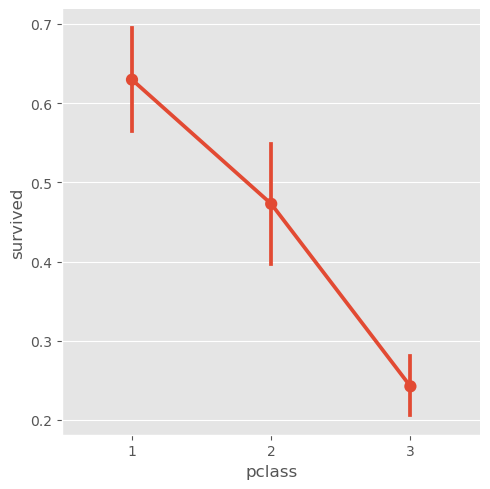

In [35]:
sns.catplot(x='pclass',y='survived',kind='point',data=titanic)

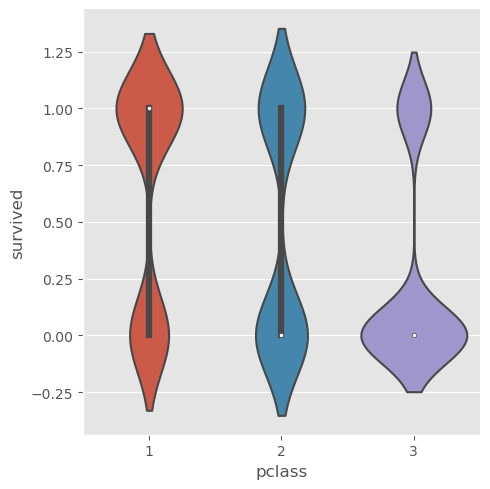

In [36]:
# Survival Density
sns.catplot(x='pclass',y='survived',kind='violin',data=titanic)

## Sex

In [37]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [38]:
titanic.sex.value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

In [39]:
pd.crosstab(titanic.sex, titanic.survived, normalize=True, margins=True)*100

survived,0,1,All
sex,,,
female,9.090909,26.150393,35.241302
male,52.525253,12.233446,64.758698
All,61.616162,38.383838,100.000000


In [40]:
titanic.groupby(['sex','survived']).survived.count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

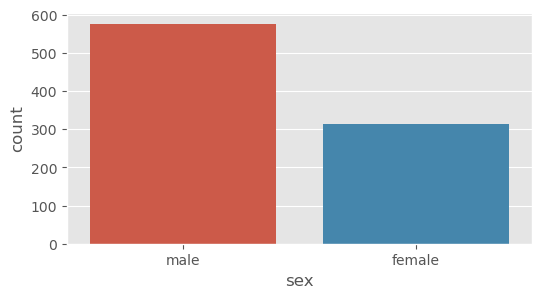

In [41]:
sns.countplot(x='sex',data=titanic)

<AxesSubplot: xlabel='sex', ylabel='count'>

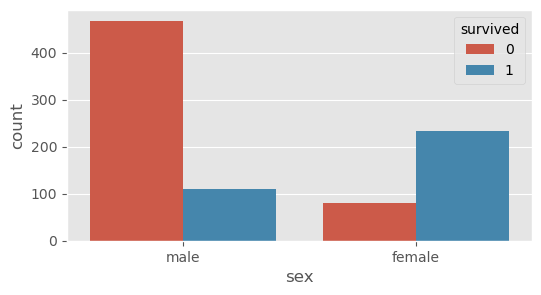

In [42]:
sns.countplot(x='sex', data=titanic, hue='survived')

<AxesSubplot: ylabel='sex'>

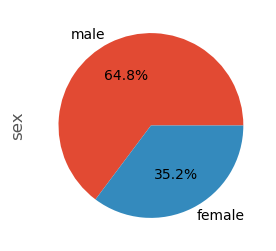

In [43]:
titanic.sex.value_counts().plot.pie(autopct='%1.1f%%')

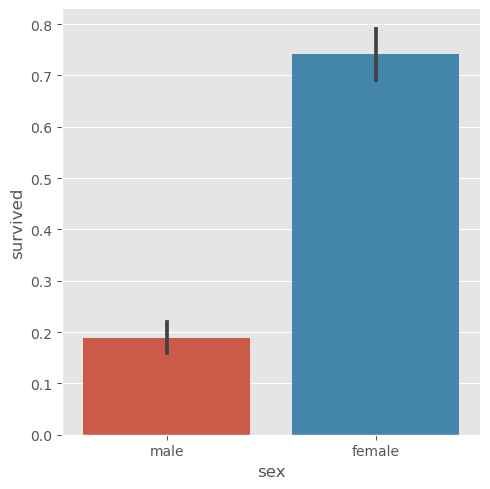

In [44]:
sns.catplot(x='sex',y='survived', data=titanic, kind='bar')

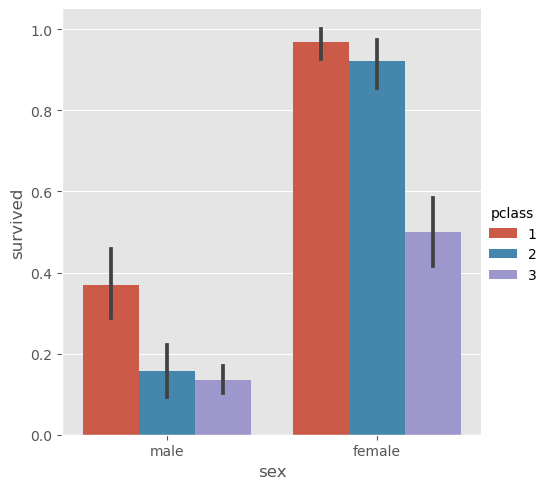

In [45]:
sns.catplot(x='sex',y='survived', data=titanic, kind='bar', hue='pclass')

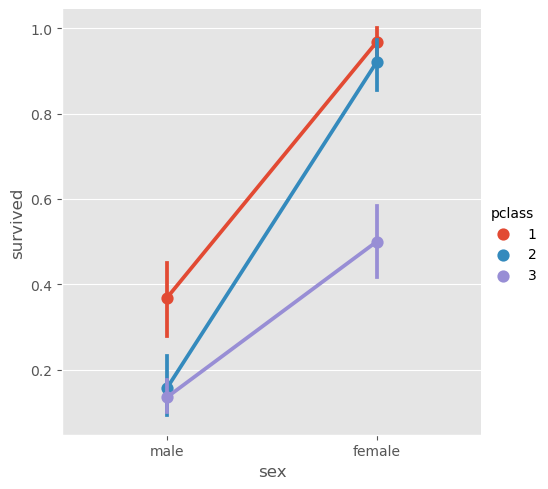

In [46]:
sns.catplot(x='sex',y='survived', data=titanic, kind='point', hue='pclass')

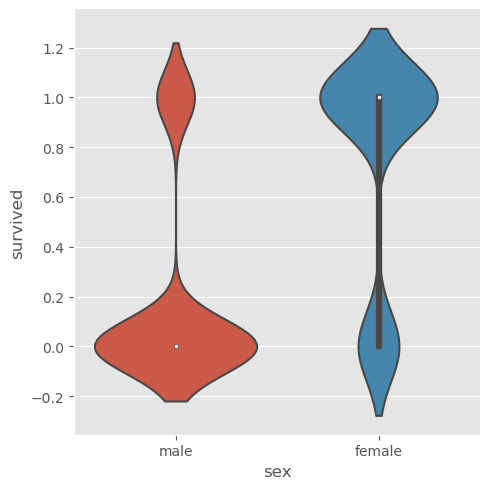

In [47]:
sns.catplot(x='sex',y='survived', data=titanic, kind='violin')

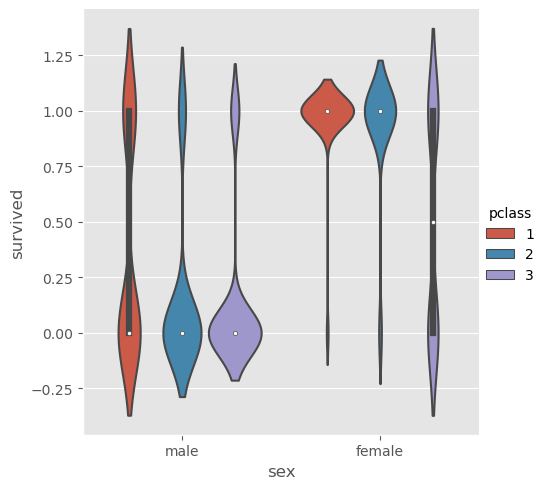

In [48]:
sns.catplot(x='sex',y='survived', data=titanic, kind='violin', hue='pclass')

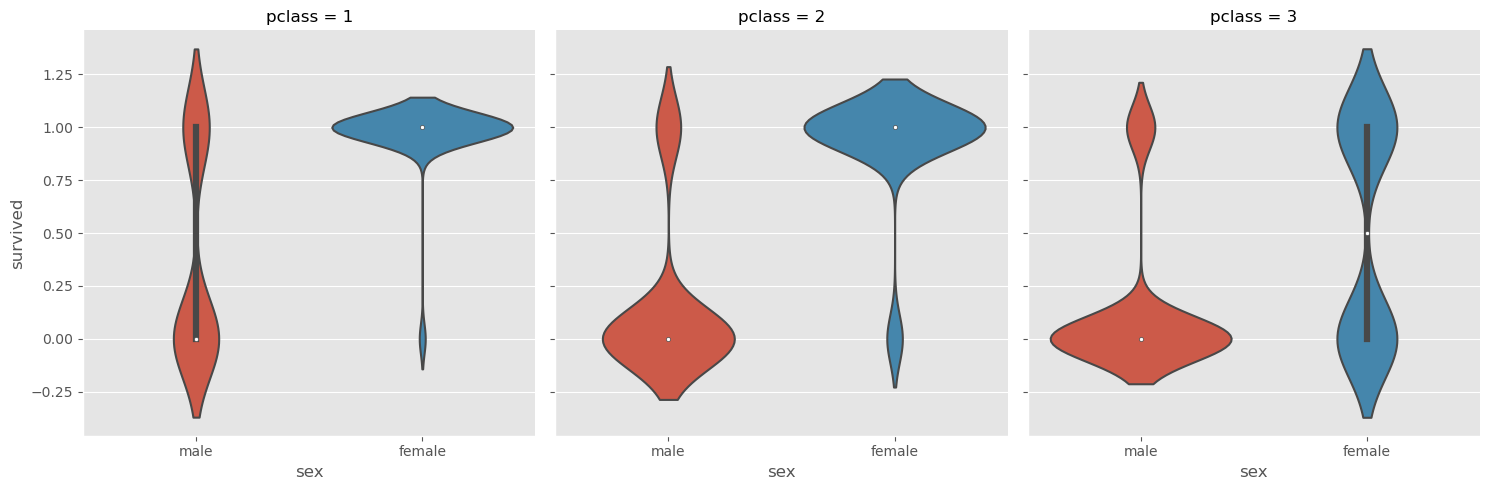

In [49]:
sns.catplot(x='sex',y='survived', data=titanic, kind='violin', col='pclass')

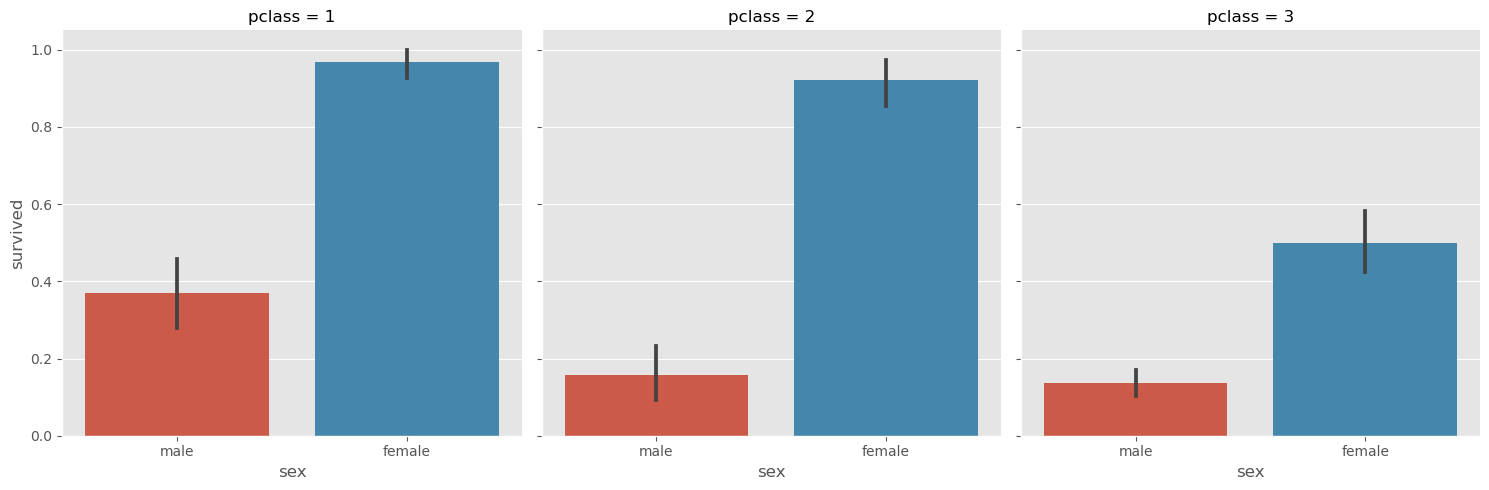

In [50]:
sns.catplot(x='sex',y='survived', data=titanic, kind='bar', col='pclass')

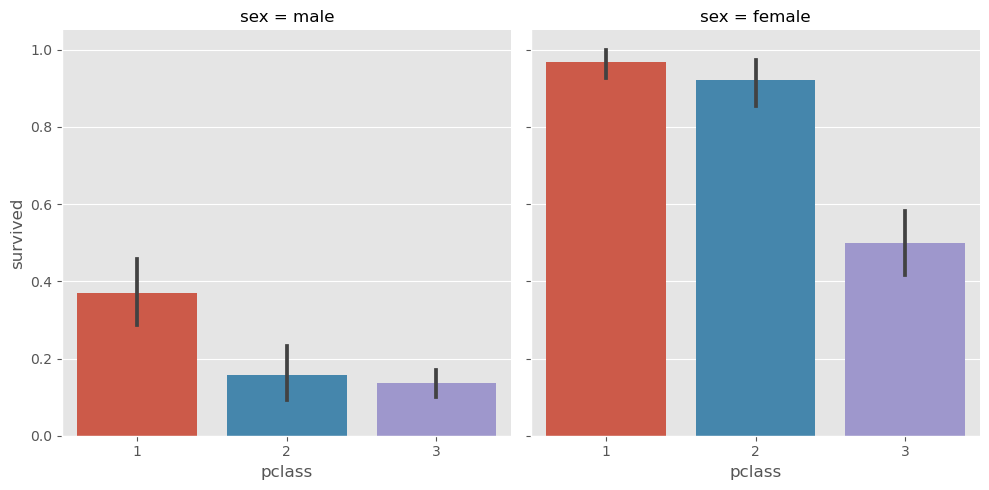

In [51]:
sns.catplot(x='pclass',y='survived', data=titanic, kind='bar', col='sex')

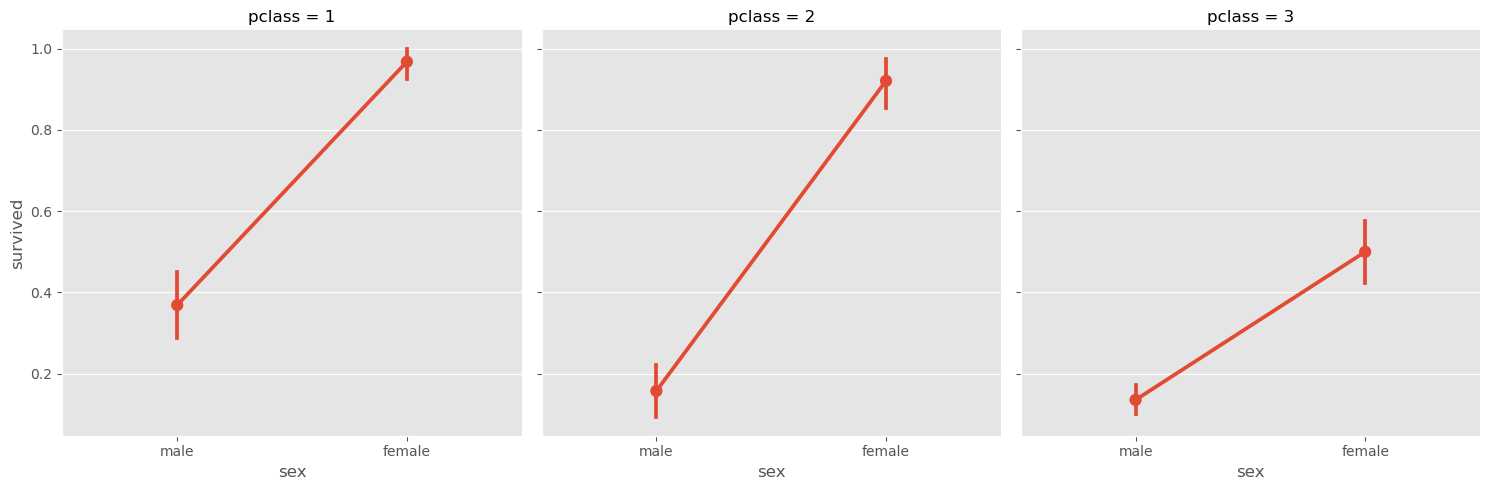

In [52]:
sns.catplot(x='sex',y='survived', data=titanic, kind='point', col='pclass')

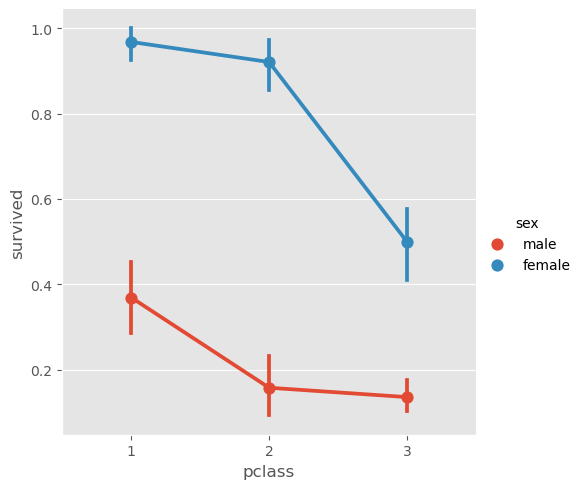

In [53]:
sns.catplot(x='pclass',y='survived', data=titanic, kind='point', hue='sex')

## Age

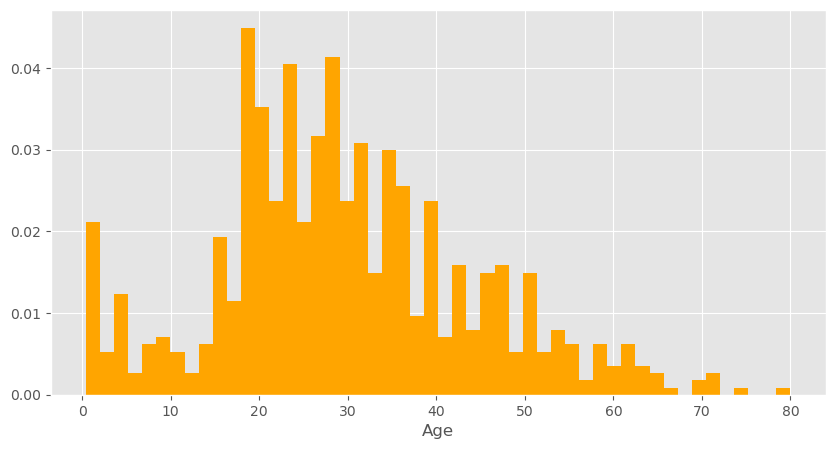

In [54]:
titanic.age.hist(bins=50, density=True, color='orange',figsize=(10,5))
plt.xlabel('Age')
plt.show()

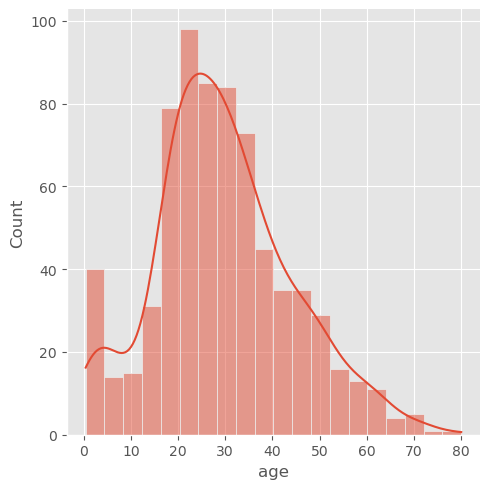

In [55]:
sns.displot(titanic['age'],kde=True)

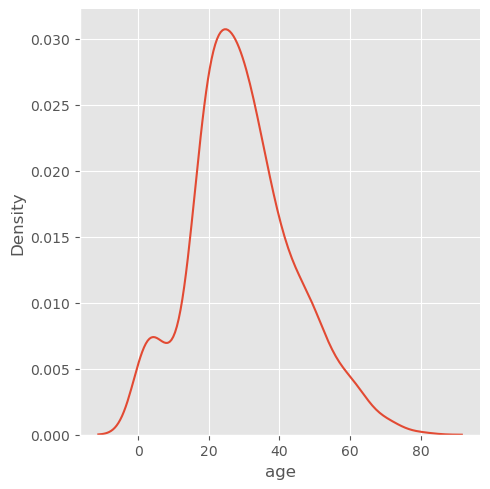

In [56]:
sns.displot(titanic['age'],kind='kde')

<AxesSubplot: xlabel='age', ylabel='Density'>

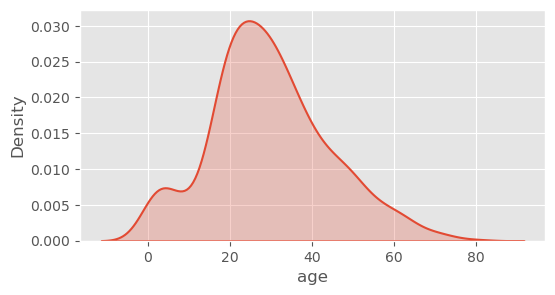

In [57]:
sns.kdeplot(titanic['age'], fill=True,linewidth=1.5)

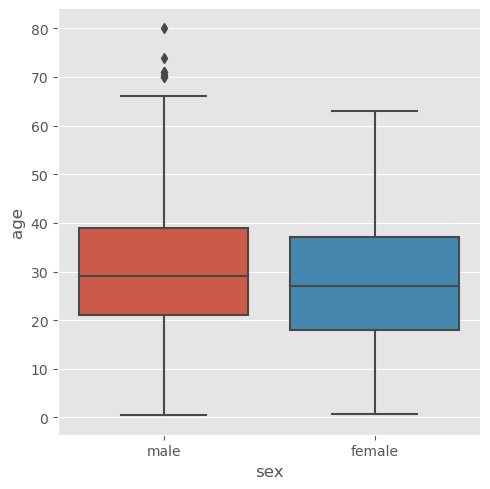

In [58]:
sns.catplot(x='sex',y='age', data=titanic, kind='box')

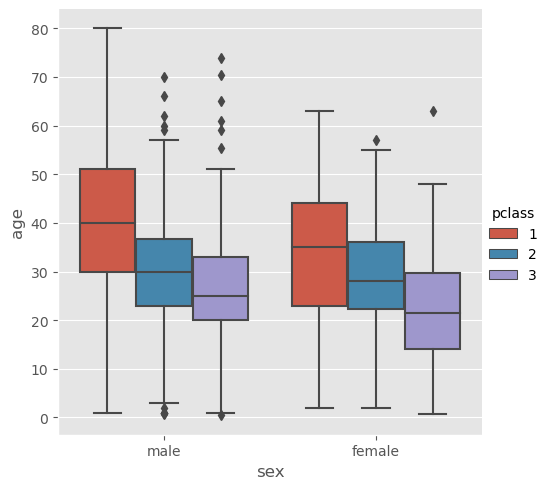

In [59]:
sns.catplot(x='sex',y='age', data=titanic, kind='box', hue='pclass')

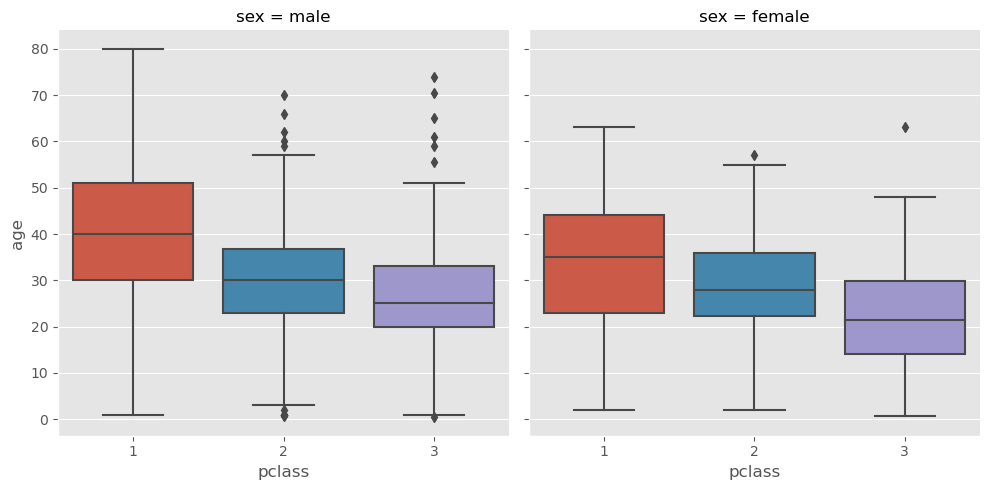

In [60]:
sns.catplot(x='pclass',y='age', data=titanic, kind='box', col='sex')

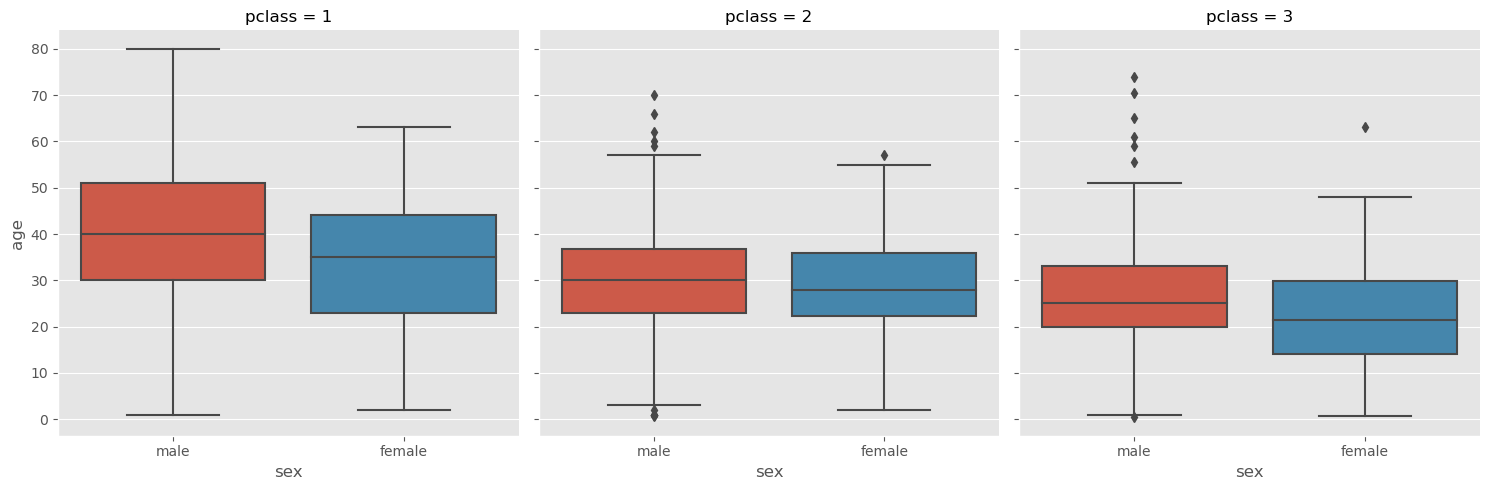

In [61]:
sns.catplot(x='sex',y='age', data=titanic, kind='box', col='pclass')

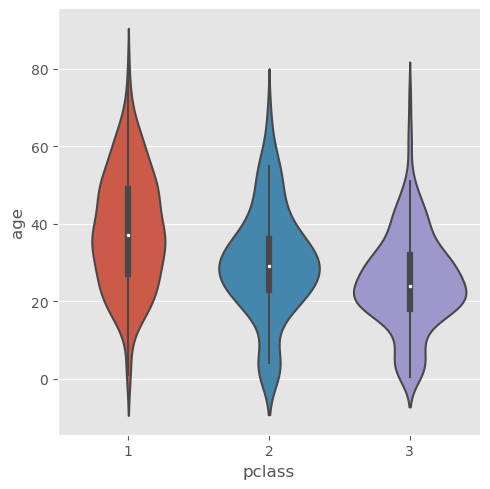

In [62]:
sns.catplot(x='pclass',y='age', kind='violin', data=titanic)

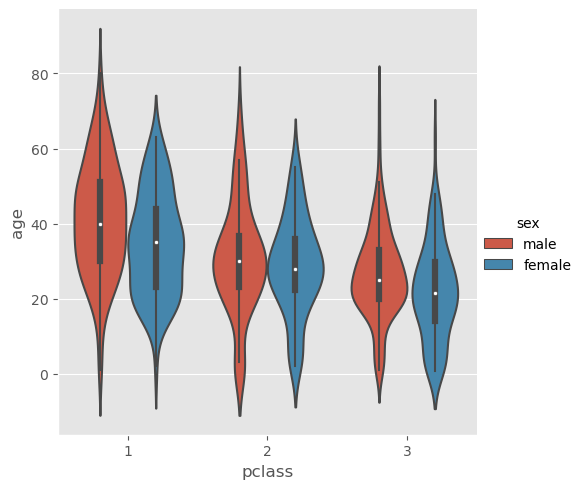

In [63]:
sns.catplot(x='pclass',y='age', data=titanic, kind='violin', hue='sex')

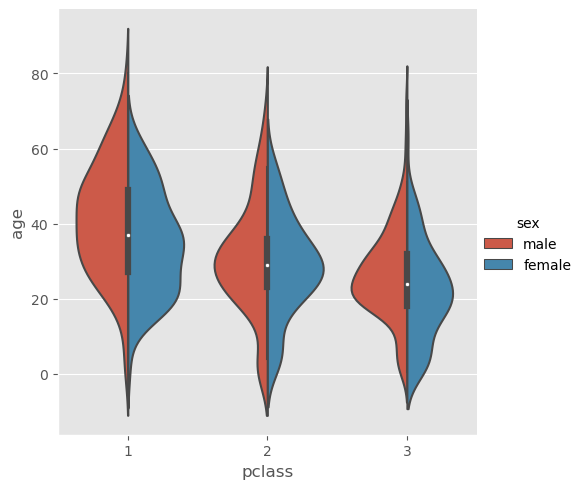

In [64]:
sns.catplot(x='pclass',y='age', data=titanic, kind='violin', hue='sex',split=True)

C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


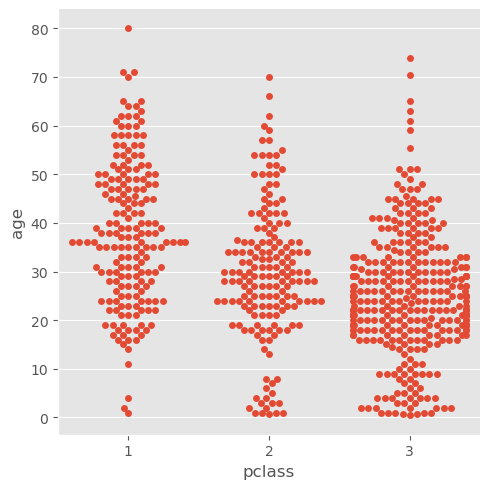

In [65]:
sns.catplot(x='pclass',y='age', kind='swarm',data=titanic)

C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


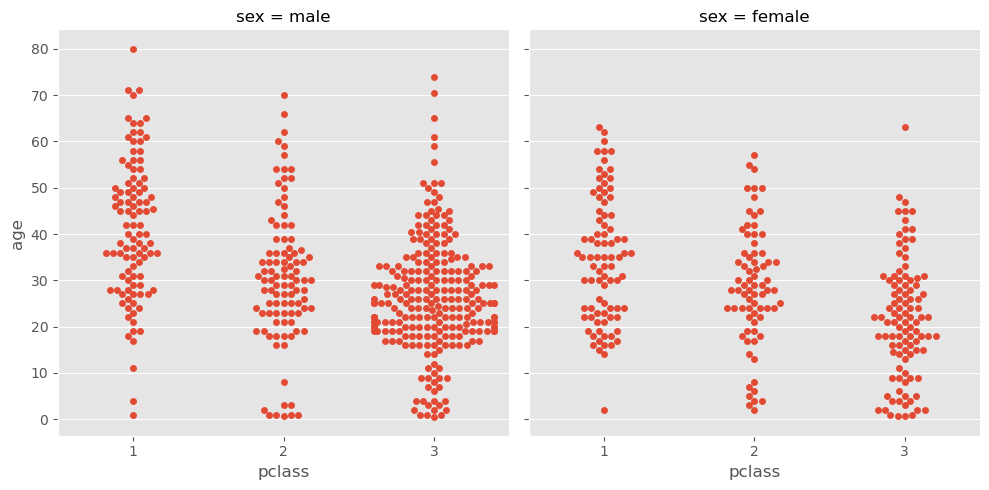

In [66]:
sns.catplot(x='pclass',y='age', kind='swarm',data=titanic, col='sex')

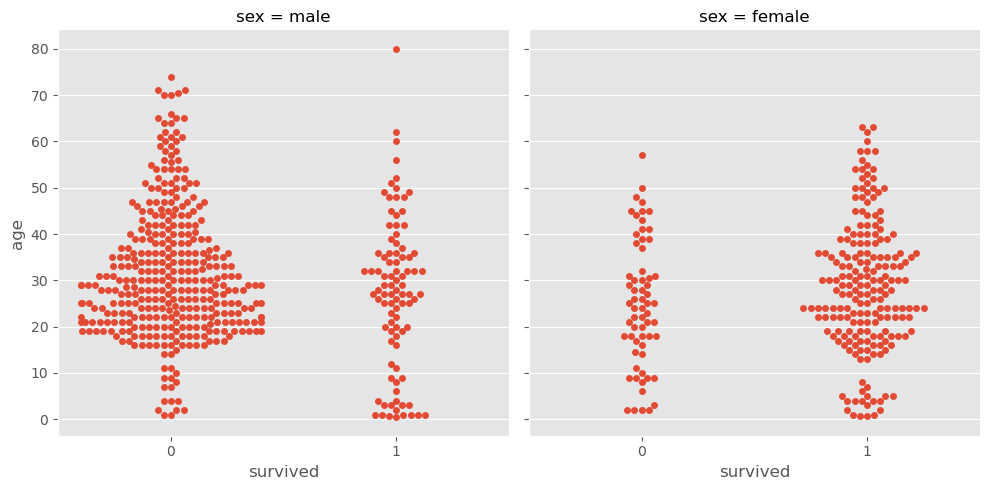

In [67]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', col='sex')

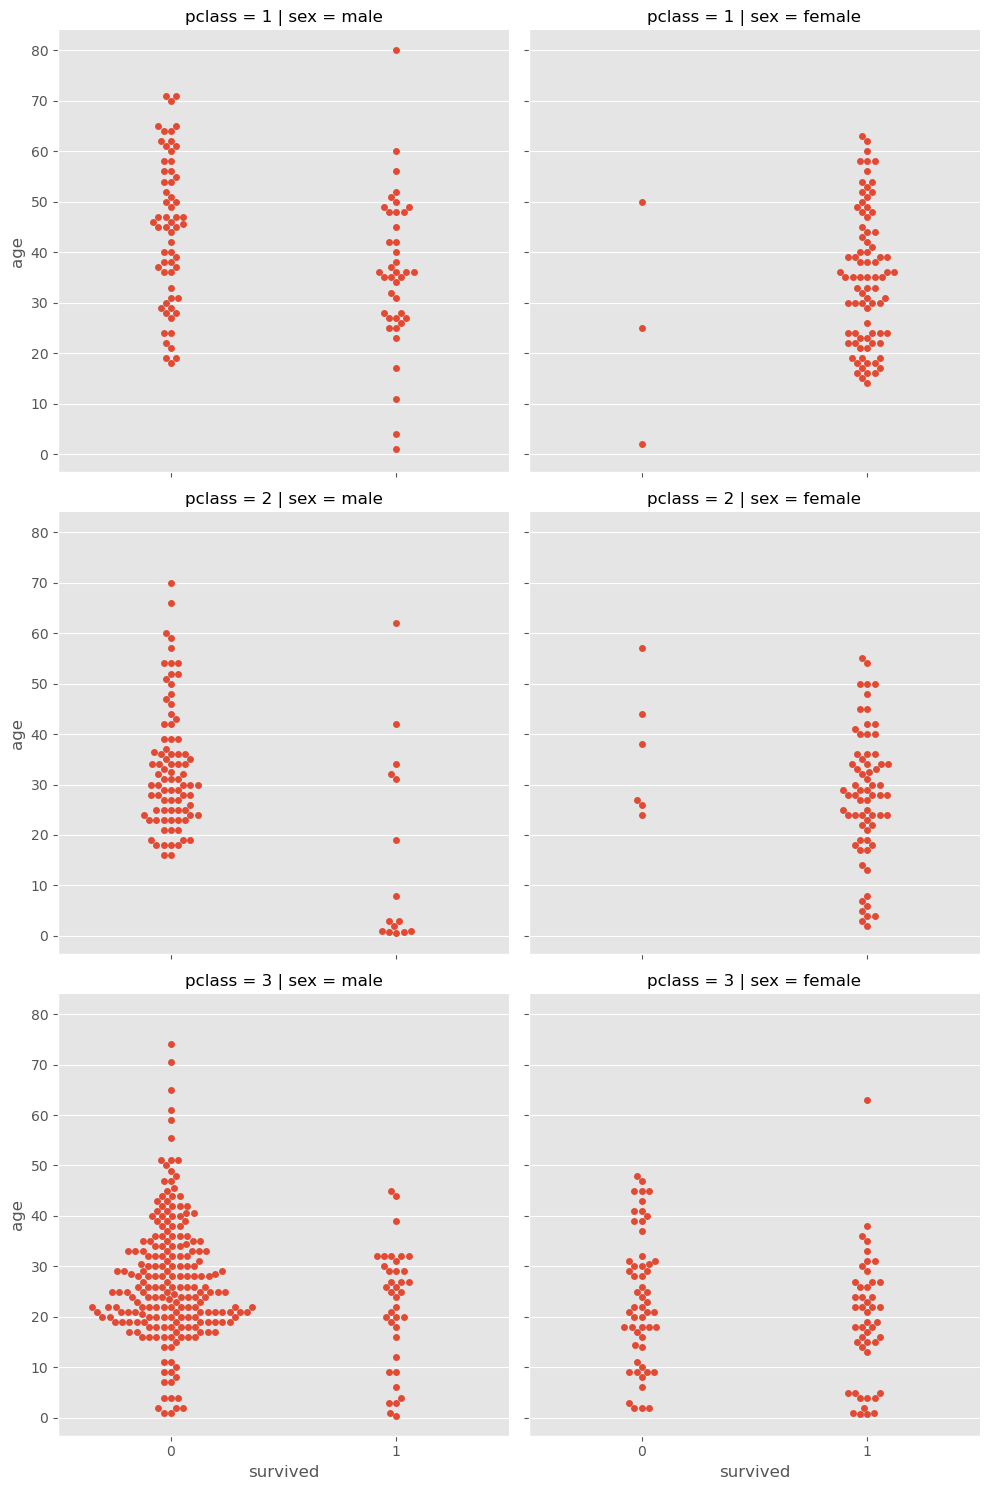

In [68]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', col='sex', row='pclass')

## Fare

In [69]:
titanic.fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

<AxesSubplot: >

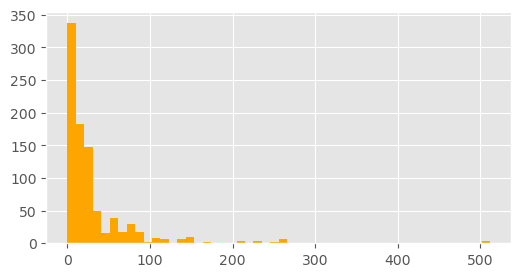

In [70]:
titanic.fare.hist(bins=50, color='orange')

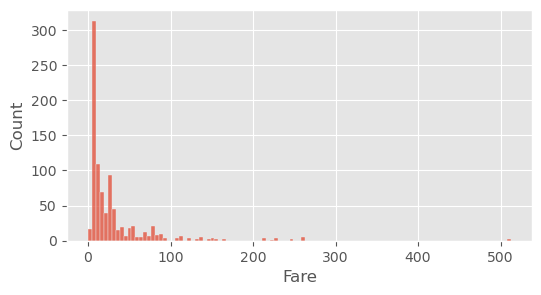

In [71]:
sns.histplot(titanic.fare)
plt.xlabel("Fare")
plt.show()

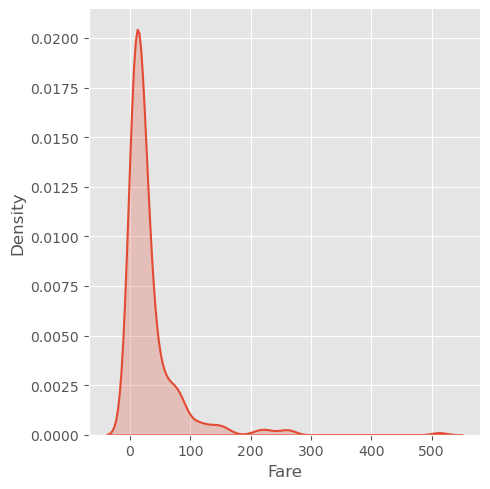

In [72]:
sns.displot(titanic.fare, kind='kde', fill=True,linewidth=1.5)
plt.xlabel("Fare")
plt.show()

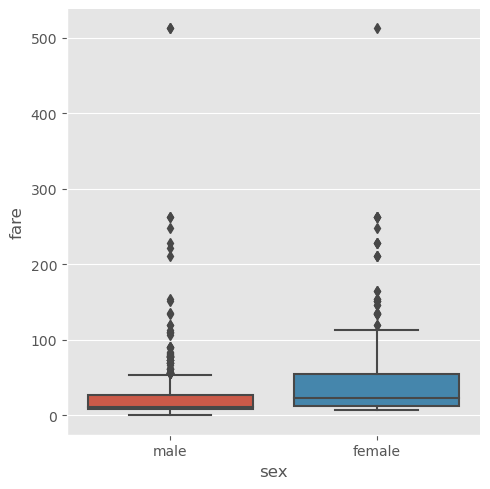

In [73]:
sns.catplot(x='sex', y='fare', data=titanic, kind='box')

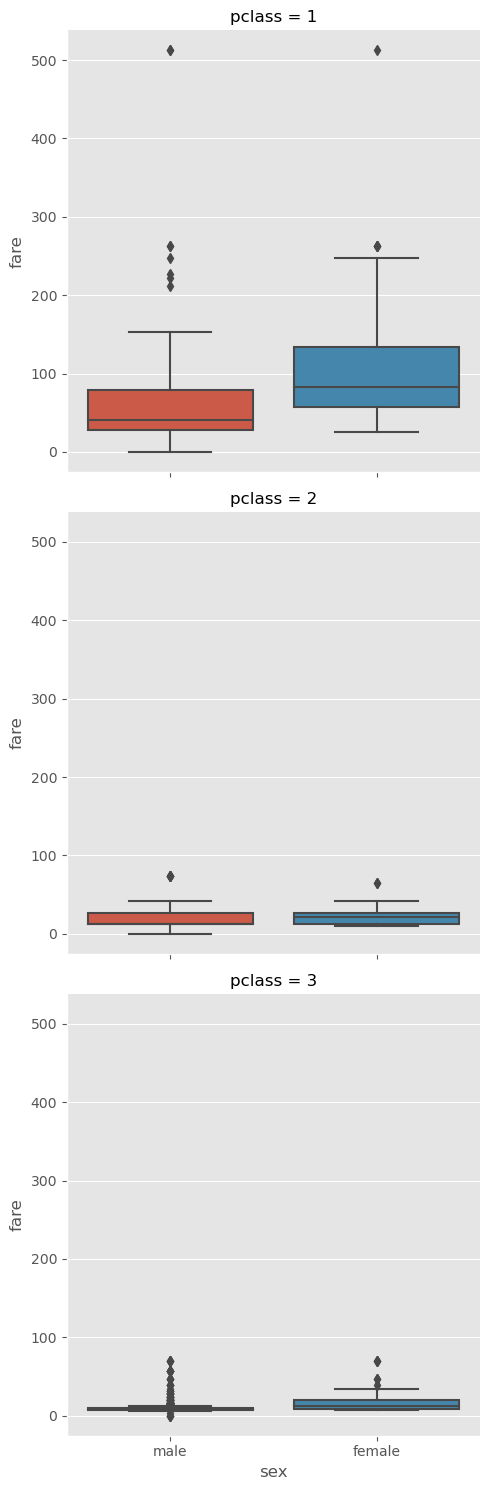

In [74]:
sns.catplot(x='sex', y='fare', data=titanic, kind='box', row='pclass')

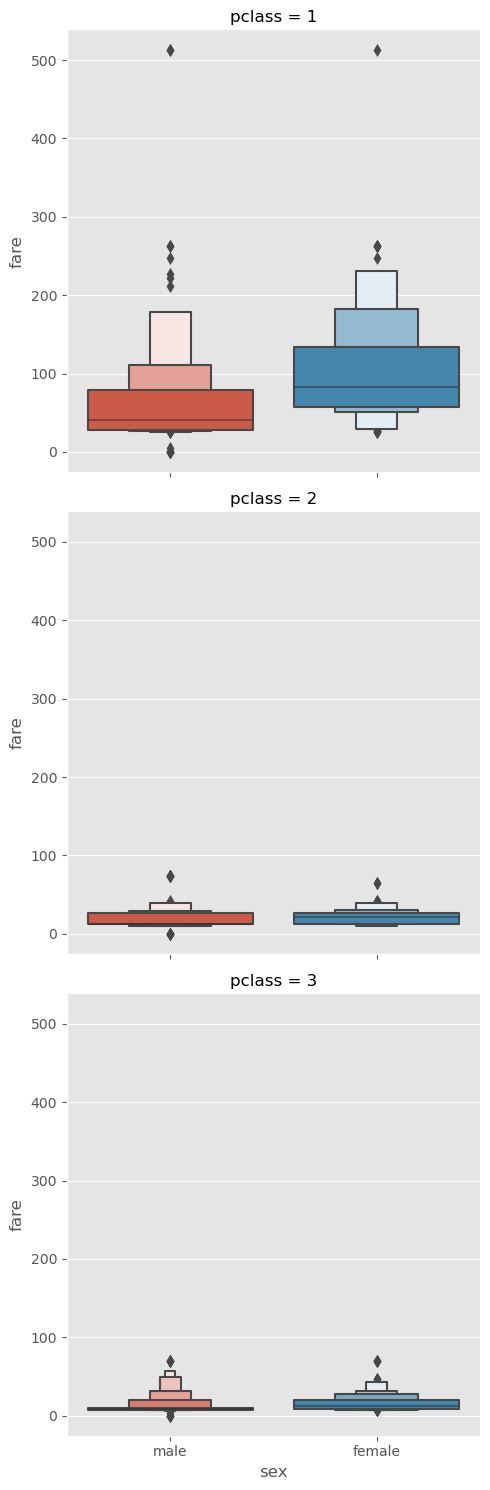

In [75]:
sns.catplot(x='sex', y='fare', data=titanic, kind='boxen', row='pclass')

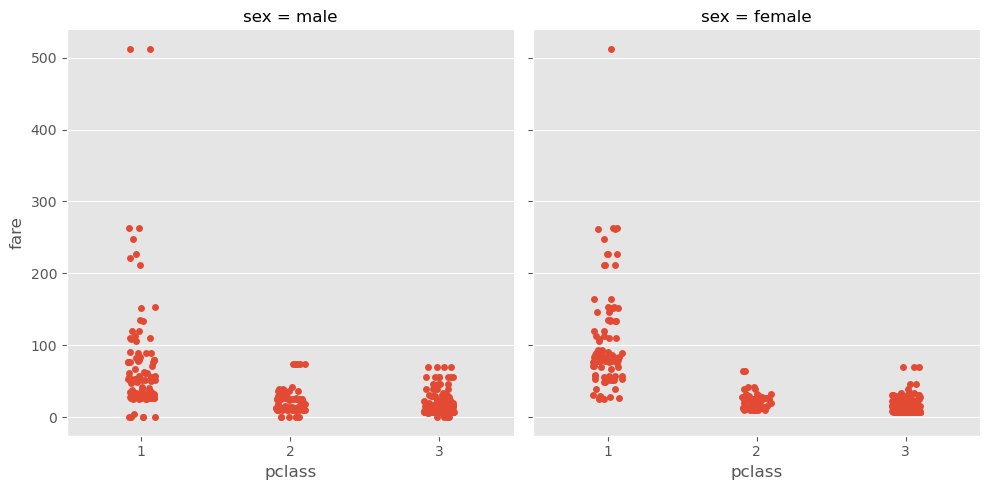

In [76]:
sns.catplot(x='pclass', y='fare', data=titanic, kind='strip',col='sex')

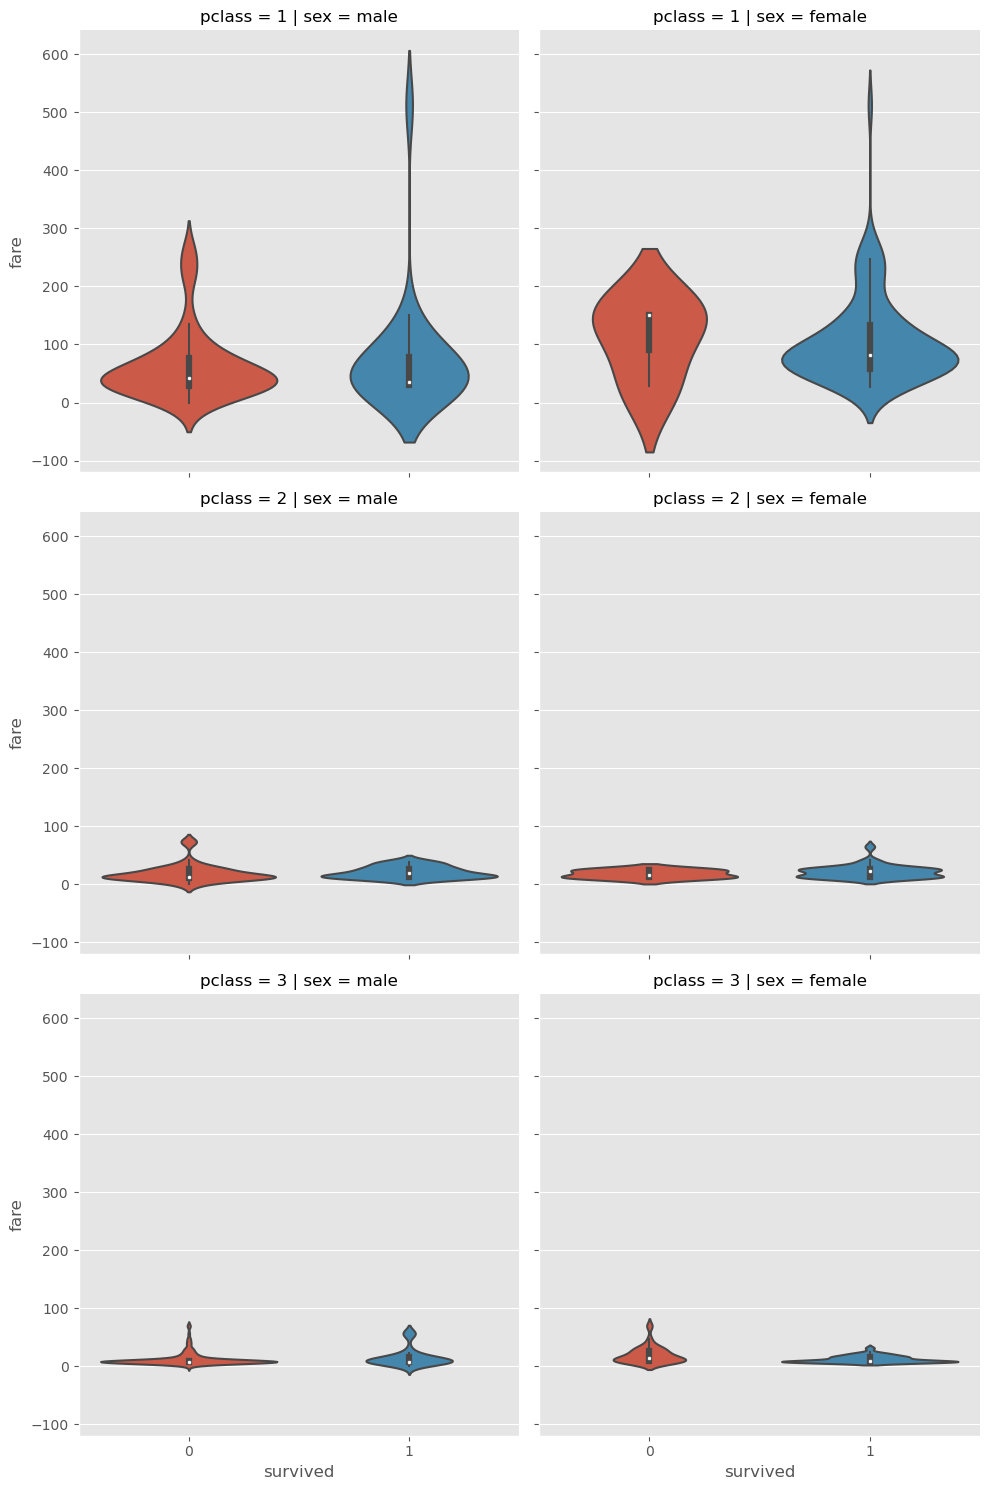

In [77]:
sns.catplot(x='survived', y='fare', data=titanic, kind='violin', col='sex', 
           row='pclass')

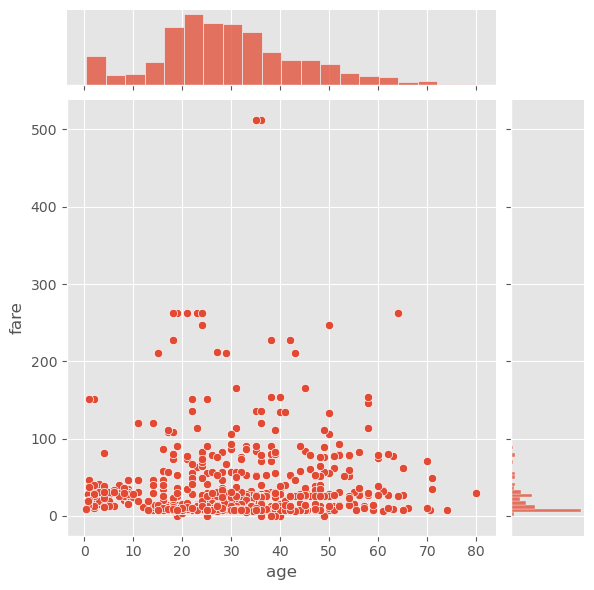

In [78]:
sns.jointplot(x='age', y='fare', data=titanic)

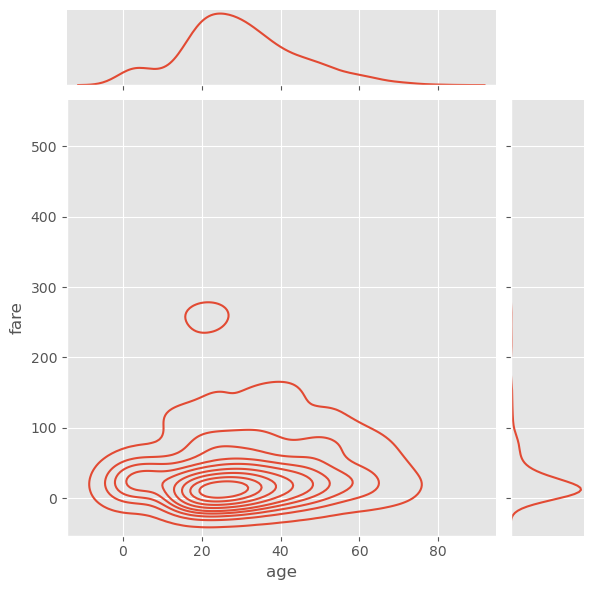

In [79]:
sns.jointplot(x='age', y='fare', data=titanic, kind='kde')

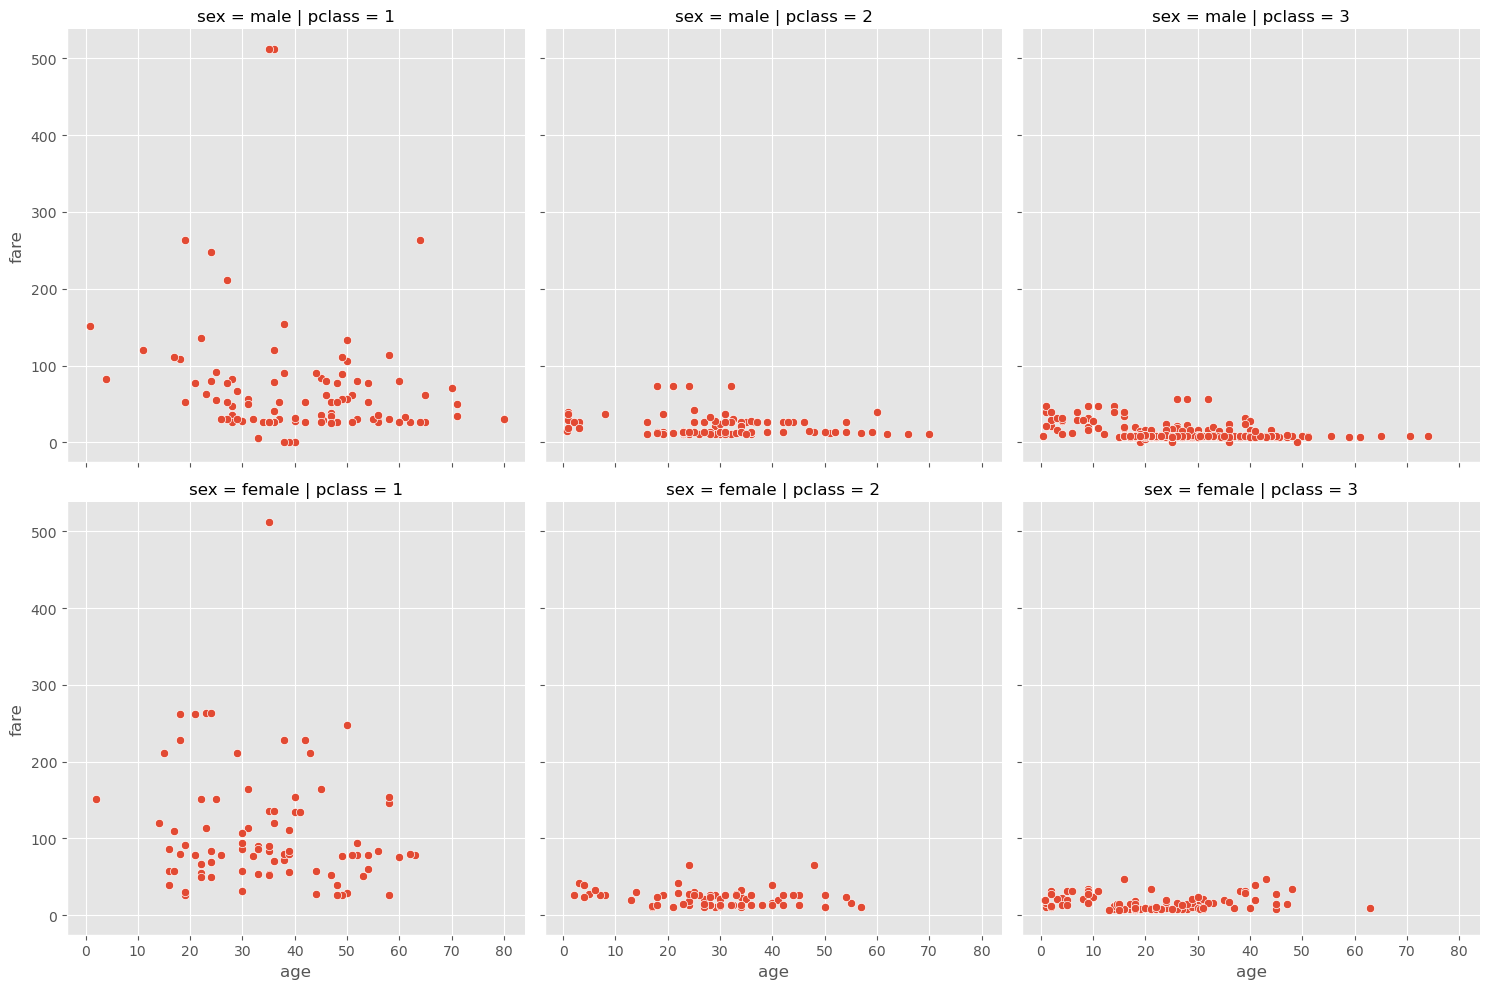

In [80]:
sns.relplot(x='age', y='fare', data=titanic, col='pclass', row='sex')

## SibSp

In [81]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot: xlabel='sibsp', ylabel='count'>

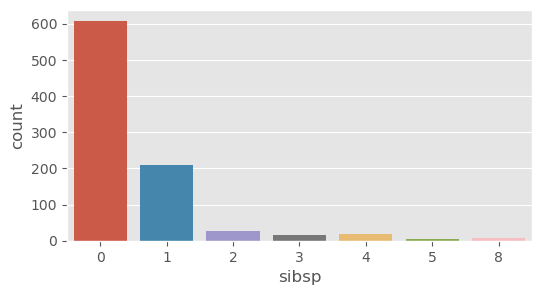

In [82]:
sns.countplot(x='sibsp', data=titanic)

<AxesSubplot: xlabel='sibsp', ylabel='count'>

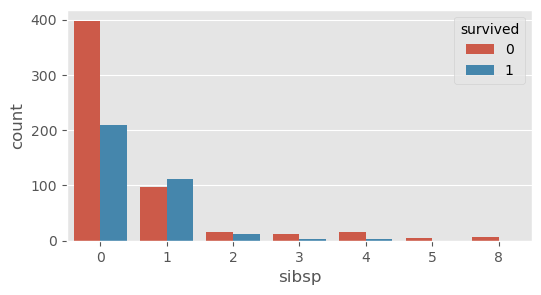

In [85]:
sns.countplot(x='sibsp', data=titanic, hue='survived')

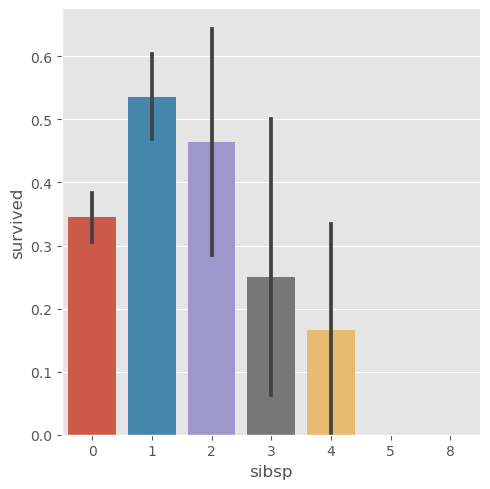

In [86]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=titanic)

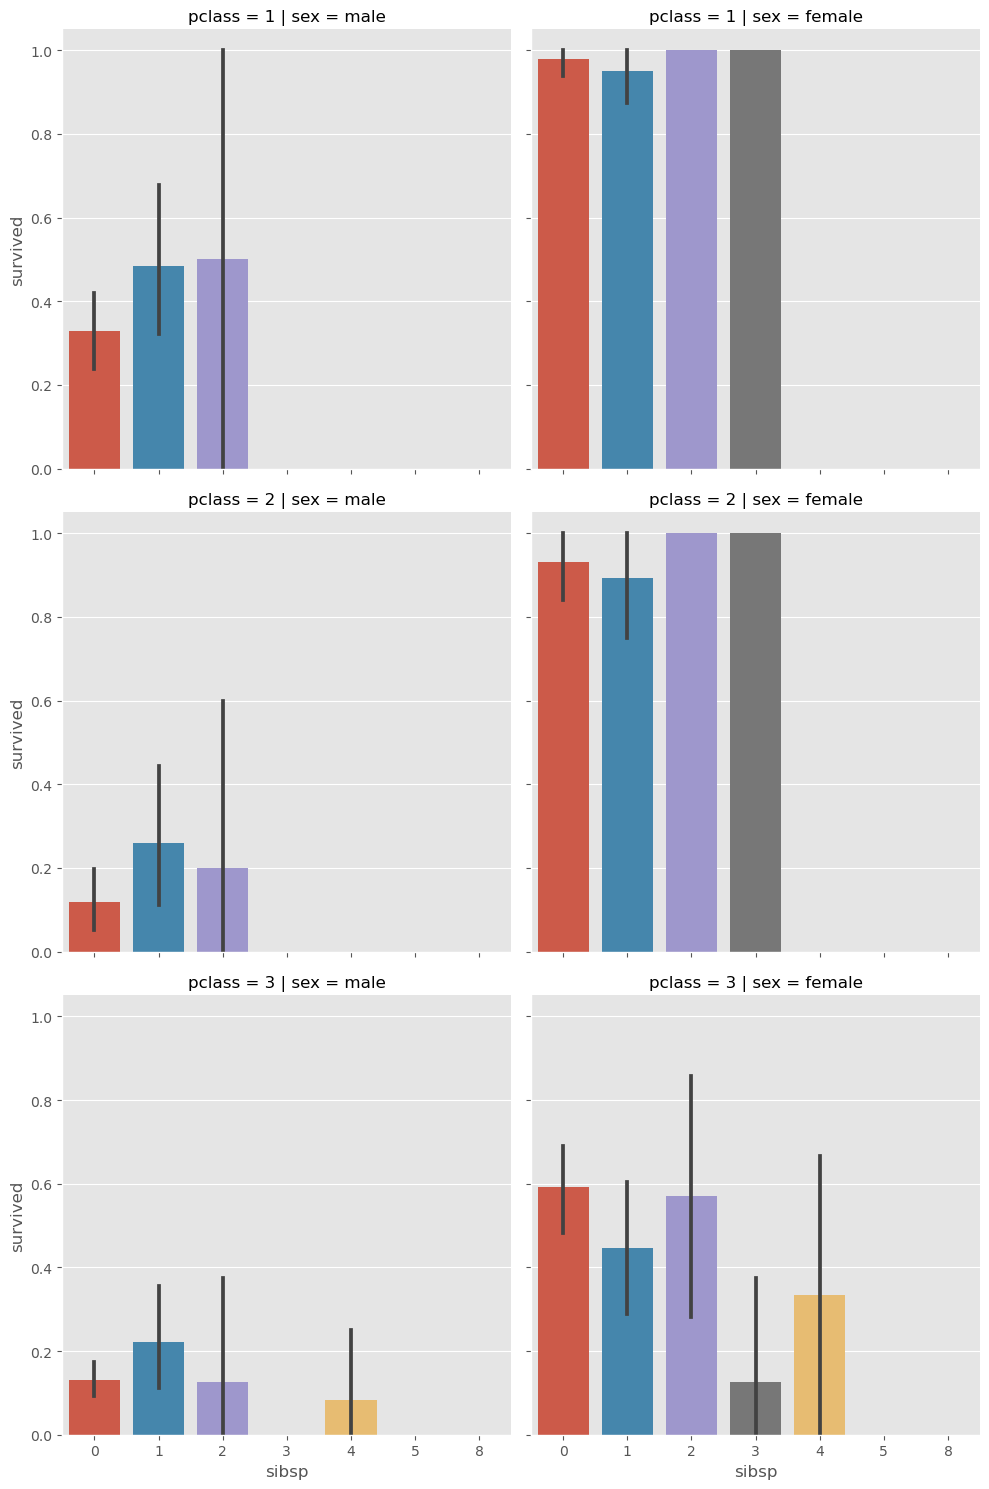

In [93]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=titanic, col='sex', row='pclass')

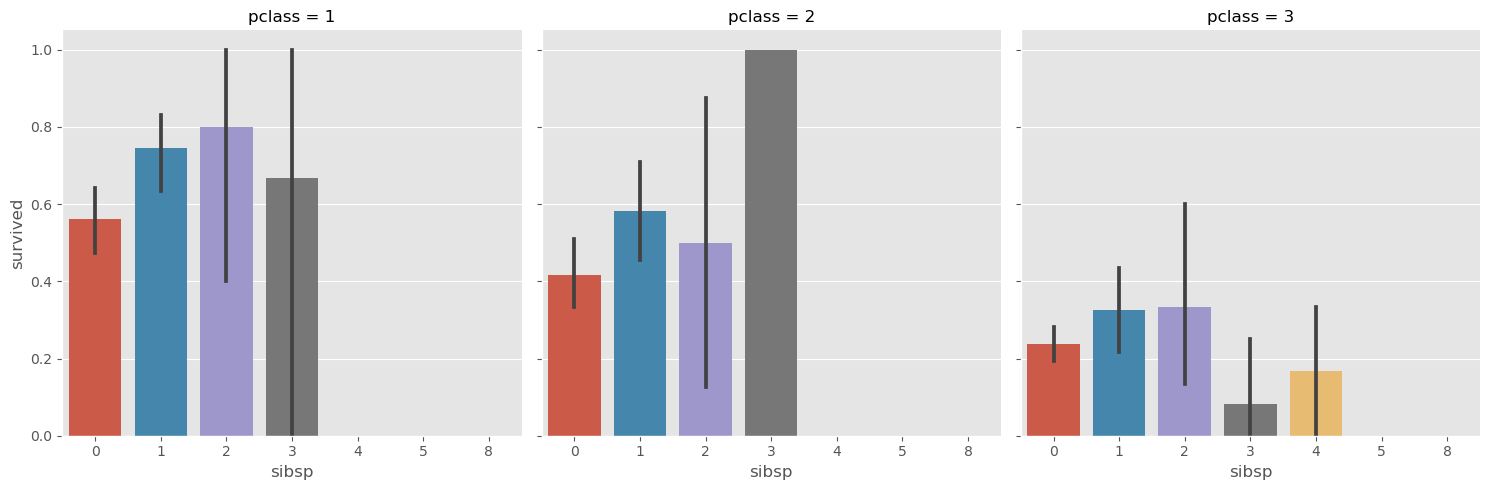

In [95]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=titanic, col='pclass')

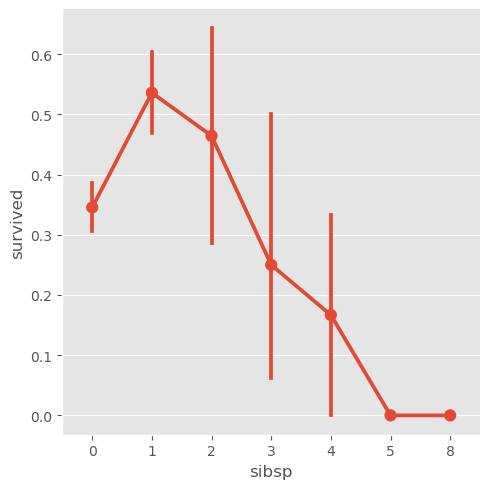

In [96]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic)

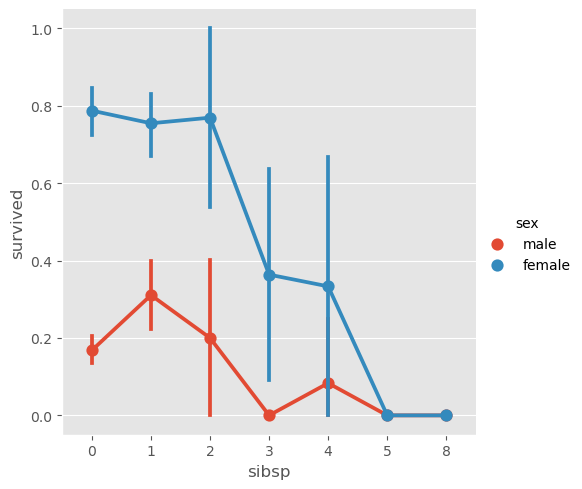

In [97]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic, hue='sex')

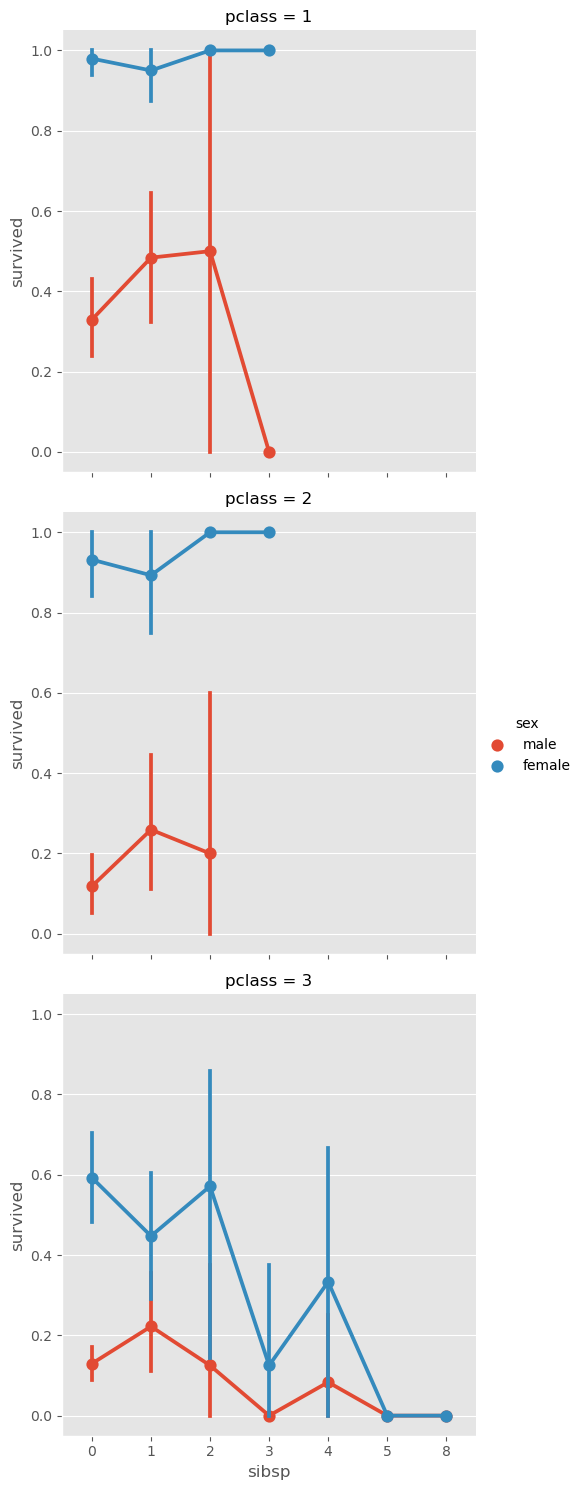

In [99]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic, hue='sex',row='pclass')

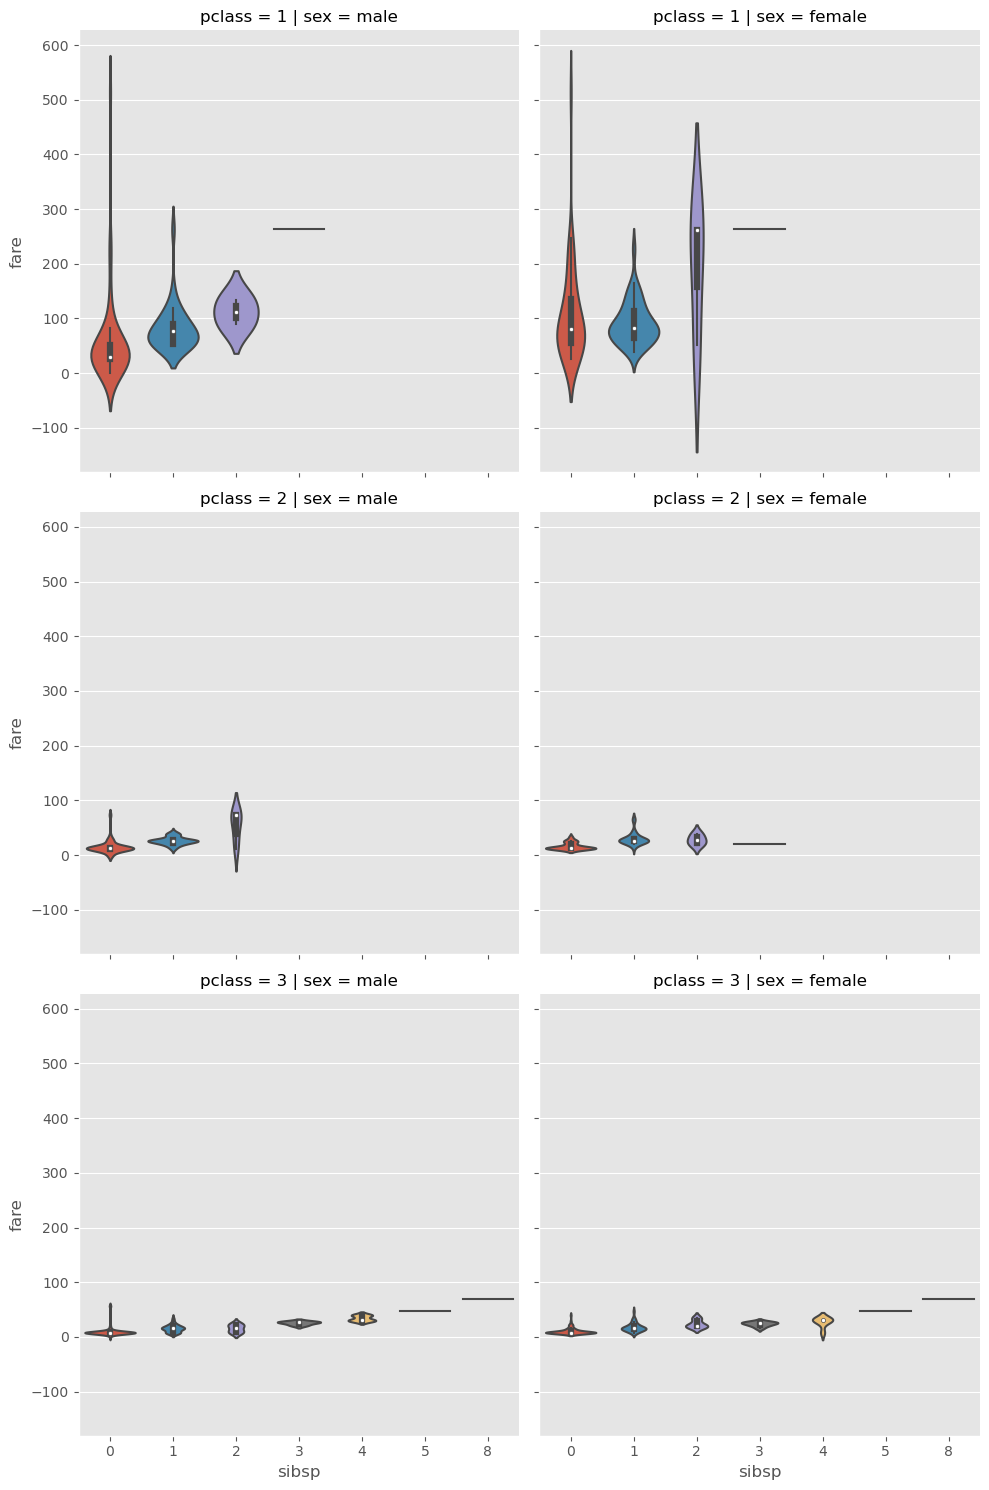

In [105]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='violin', col='sex', row='pclass')

## Parch

In [107]:
titanic.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot: xlabel='parch', ylabel='count'>

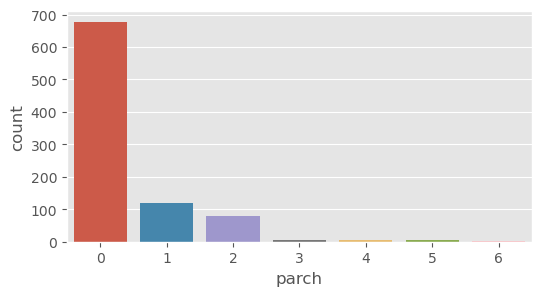

In [108]:
sns.countplot(x='parch', data=titanic)

<AxesSubplot: xlabel='parch', ylabel='count'>

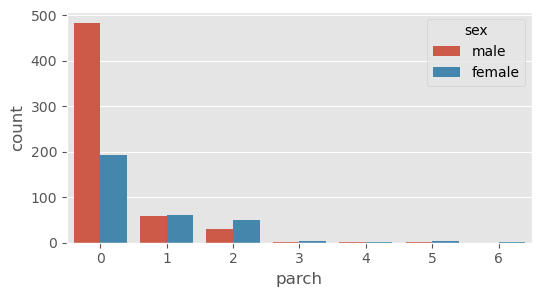

In [109]:
sns.countplot(x='parch', data=titanic, hue='sex')

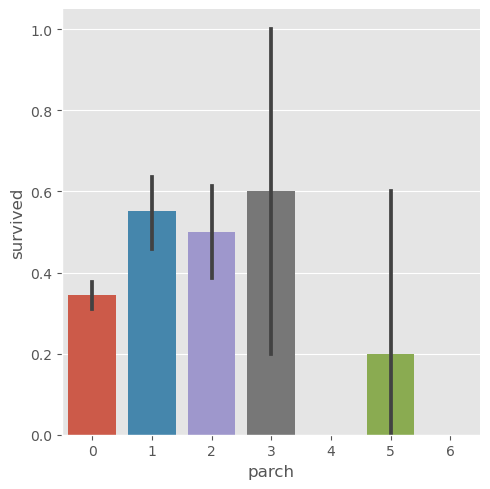

In [110]:
sns.catplot(x='parch', y='survived',data=titanic, kind='bar')

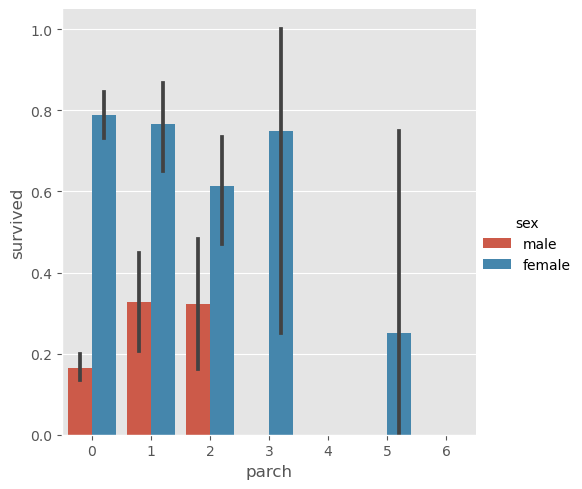

In [111]:
sns.catplot(x='parch', y='survived',data=titanic, kind='bar', hue='sex')

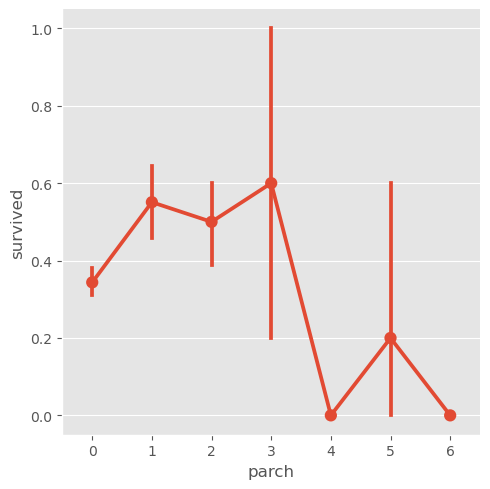

In [114]:
sns.catplot(x='parch', y='survived',data=titanic, kind='point')

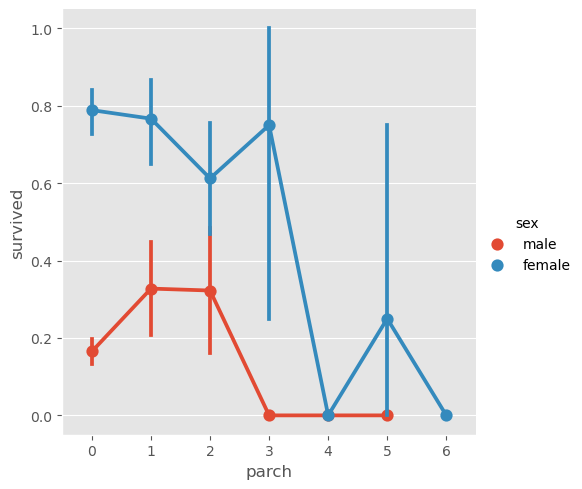

In [115]:
sns.catplot(x='parch', y='survived',data=titanic, kind='point', hue='sex')

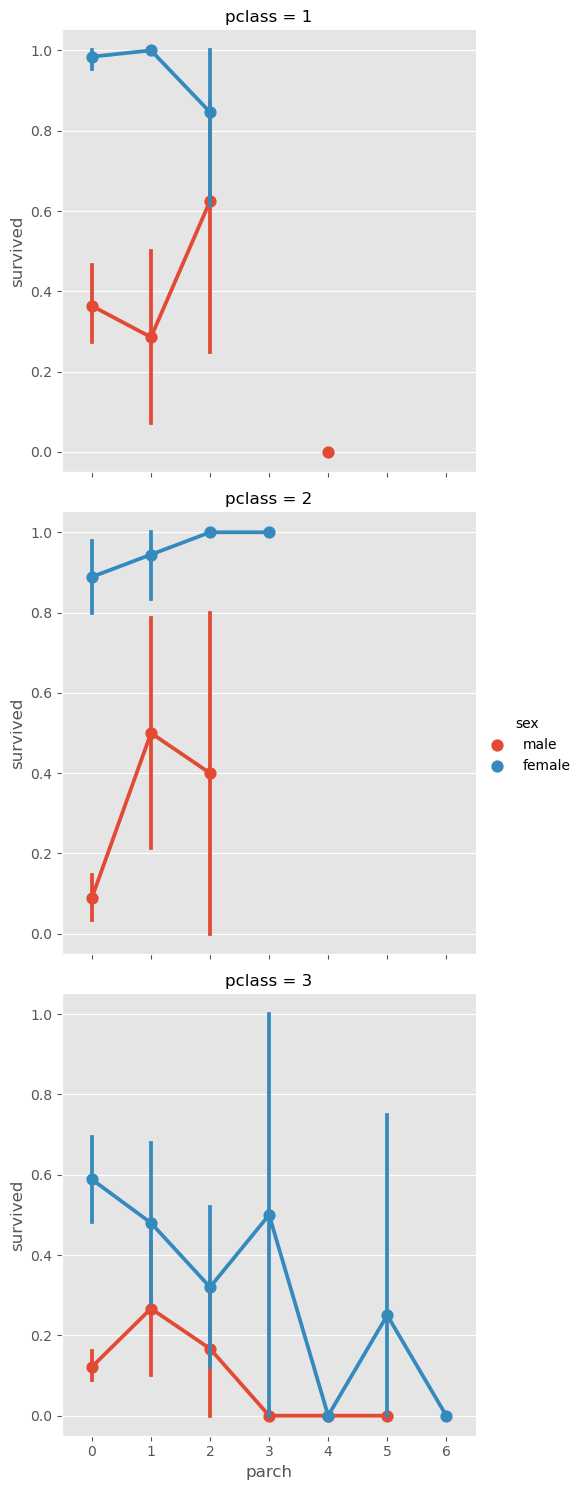

In [117]:
sns.catplot(x='parch', y='survived',data=titanic, kind='point', hue='sex', row='pclass')

## Embarked

In [119]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot: xlabel='embarked', ylabel='count'>

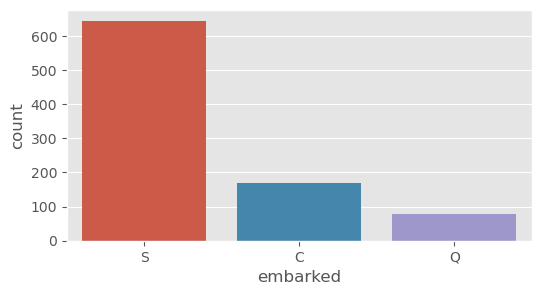

In [121]:
sns.countplot(x='embarked',data=titanic )

In [123]:
titanic.embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: embarked, dtype: float64

In [124]:
titanic.groupby(['survived', 'embarked']).survived.count()

survived  embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: survived, dtype: int64

In [128]:
pd.crosstab(titanic.survived, titanic.embarked)

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


In [127]:
pd.crosstab(titanic.survived, titanic.embarked, normalize=True)*100

embarked,C,Q,S
survived,,,
0,8.436445,5.286839,48.031496
1,10.461192,3.374578,24.409449


<AxesSubplot: xlabel='embarked', ylabel='count'>

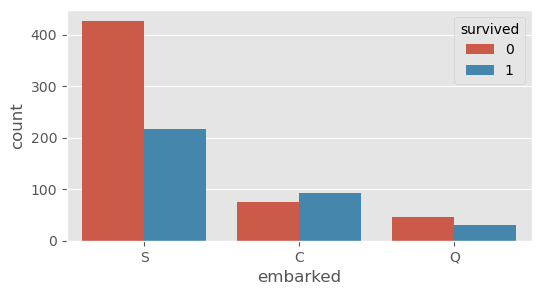

In [129]:
sns.countplot(x='embarked',data=titanic, hue='survived' )

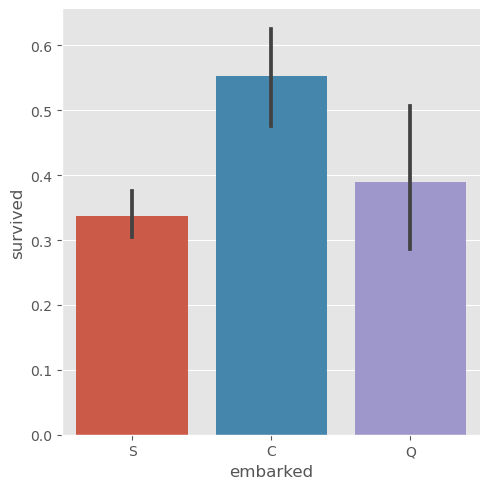

In [130]:
sns.catplot(x='embarked', y='survived', kind='bar', data=titanic)

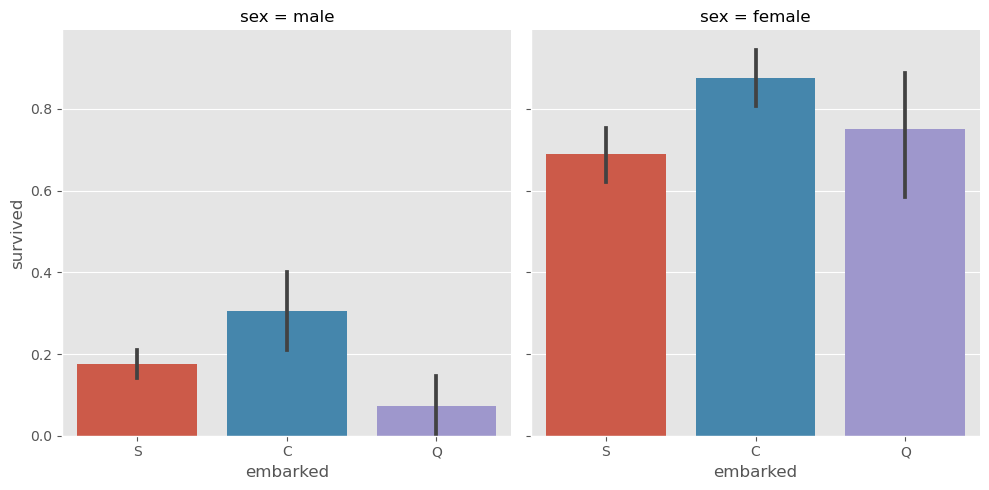

In [132]:
sns.catplot(x='embarked', y='survived', kind='bar', data=titanic, col='sex')

## Who

In [134]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [136]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [138]:
titanic.who.value_counts(normalize=True)*100

man      60.269360
woman    30.415264
child     9.315376
Name: who, dtype: float64

<AxesSubplot: xlabel='who', ylabel='count'>

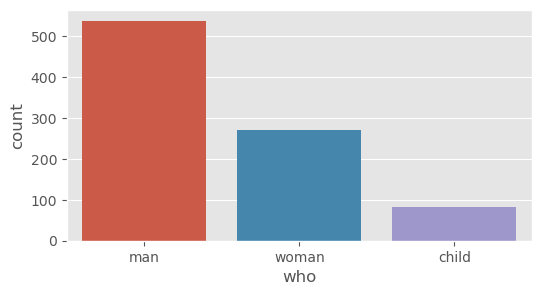

In [140]:
sns.countplot(data=titanic, x='who')

<AxesSubplot: xlabel='who', ylabel='count'>

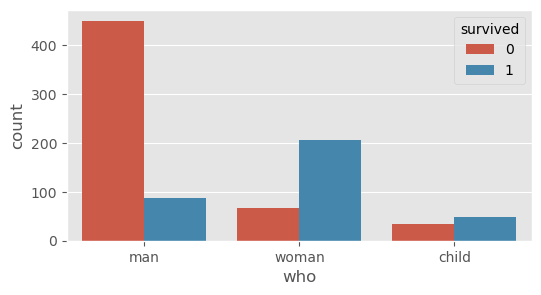

In [142]:
sns.countplot(data=titanic, x='who', hue='survived')

In [143]:
pd.crosstab(titanic.who, titanic.survived)

survived,0,1
who,,
child,34,49
man,449,88
woman,66,205


In [151]:
pd.crosstab(titanic.who, titanic.survived, normalize=True, margins=True)*100

survived,0,1,All
who,,,
child,3.815937,5.499439,9.315376
man,50.392817,9.876543,60.269360
woman,7.407407,23.007856,30.415264
All,61.616162,38.383838,100.000000


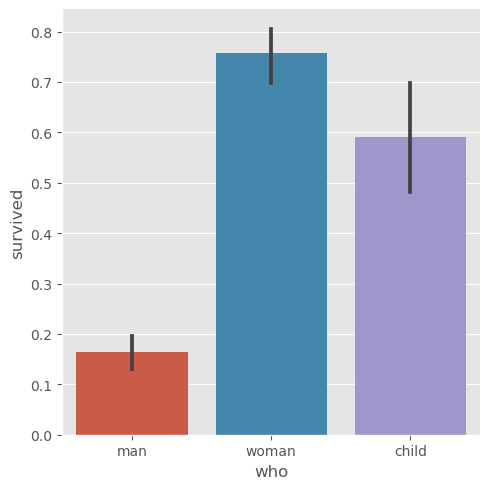

In [148]:
sns.catplot(data=titanic, x='who', y='survived',kind='bar')

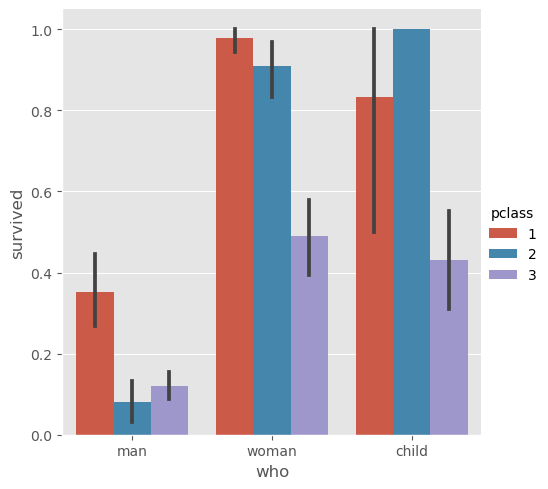

In [154]:
sns.catplot(data=titanic, x='who', y='survived',kind='bar', hue='pclass')

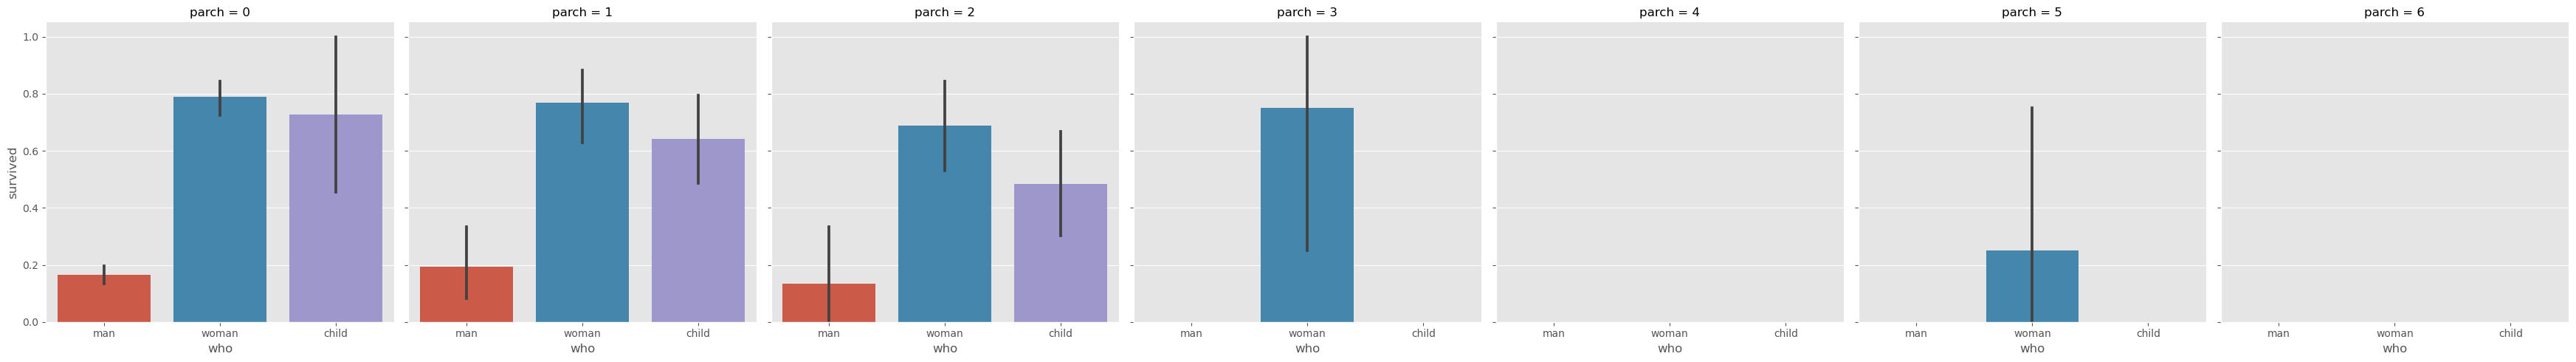

In [155]:
sns.catplot(data=titanic, x='who', y='survived',kind='bar', col='parch')

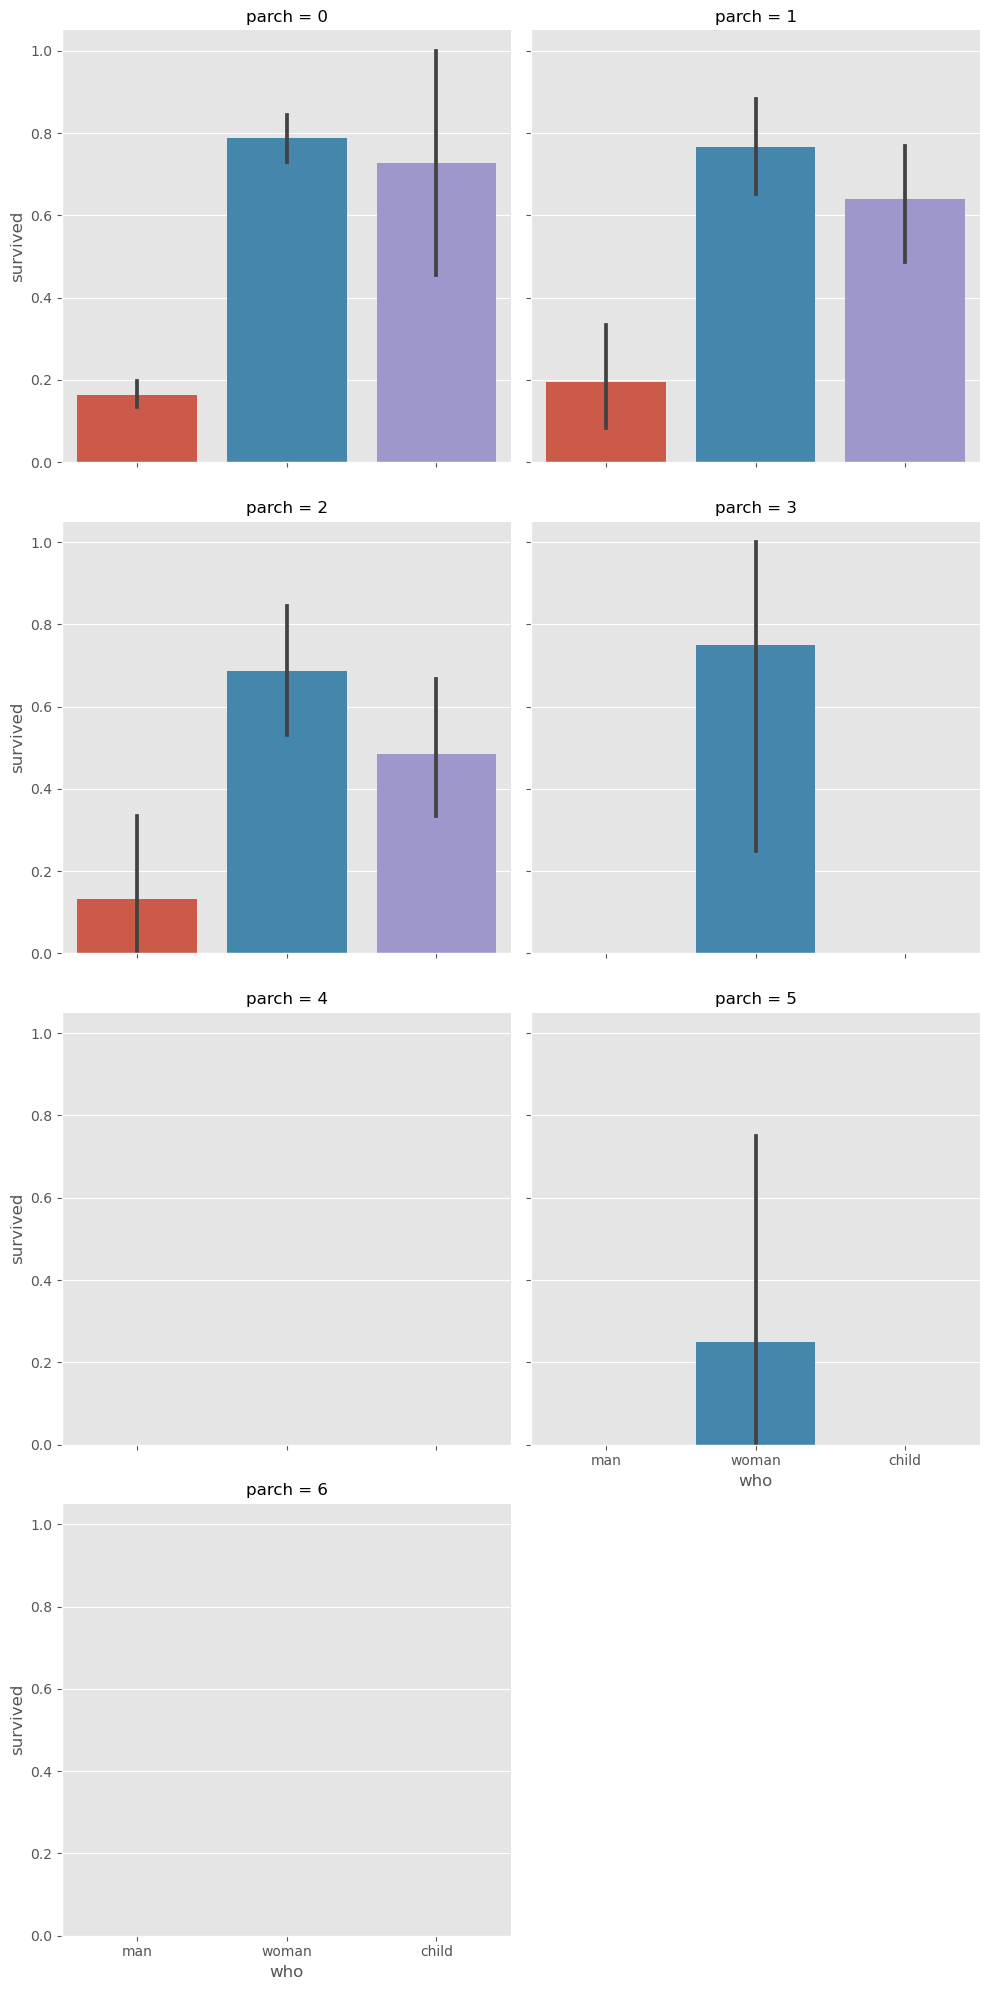

In [156]:
sns.catplot(data=titanic, x='who', y='survived',kind='bar', col='parch',col_wrap=2)